In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import kstest
import statsmodels.api as sm


import statistics


In [2]:
data = pd.read_csv('./walmart_data.csv')
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

# Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [5]:
print(f"Number of rows: {data.shape[0]:,} \nNumber of columns: {data.shape[1]}")

Number of rows: 550,068 
Number of columns: 10


In [6]:
for i in data.columns:
    print(i,':',data[i].nunique())
# data.nunique()

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [7]:
print("----------Checking for the null values------------")
for i in data.columns:
    print(i,':',data[i].isnull().sum())

----------Checking for the null values------------
User_ID : 0
Product_ID : 0
Gender : 0
Age : 0
Occupation : 0
City_Category : 0
Stay_In_Current_City_Years : 0
Marital_Status : 0
Product_Category : 0
Purchase : 0


In [8]:
data.duplicated().sum()

0

In [9]:
data.describe(include="all")

User_ID Product_ID  Gender     Age     Occupation City_Category  \
count   5.500680e+05     550068  550068  550068  550068.000000        550068   
unique           NaN       3631       2       7            NaN             3   
top              NaN  P00265242       M   26-35            NaN             B   
freq             NaN       1880  414259  219587            NaN        231173   
mean    1.003029e+06        NaN     NaN     NaN       8.076707           NaN   
std     1.727592e+03        NaN     NaN     NaN       6.522660           NaN   
min     1.000001e+06        NaN     NaN     NaN       0.000000           NaN   
25%     1.001516e+06        NaN     NaN     NaN       2.000000           NaN   
50%     1.003077e+06        NaN     NaN     NaN       7.000000           NaN   
75%     1.004478e+06        NaN     NaN     NaN      14.000000           NaN   
max     1.006040e+06        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  \
count                      550068   550068.000000     550068.000000   
unique                          5             NaN               NaN   
top                             1             NaN               NaN   
freq                       193821             NaN               NaN   
mean                          NaN        0.409653          5.404270   
std                           NaN        0.491770          3.936211   
min                           NaN        0.000000          1.000000   
25%                           NaN        0.000000          1.000000   
50%                           NaN        0.000000          5.000000   
75%                           NaN        1.000000          8.000000   
max                           NaN        1.000000         20.000000   

             Purchase  
count   550068.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      9263.968713  
std       5023.065394  
min         12.000000  
25%       5823.000000  
50%       8047.000000  
75%      12054.000000  
max      23961.000000

In [10]:
col = ['User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status']
data[col] = data[col].astype('category')
data.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

In [11]:
data.describe().T

count         mean          std   min     25%     50%  \
Occupation        550068.0     8.076707     6.522660   0.0     2.0     7.0   
Product_Category  550068.0     5.404270     3.936211   1.0     1.0     5.0   
Purchase          550068.0  9263.968713  5023.065394  12.0  5823.0  8047.0   

                      75%      max  
Occupation           14.0     20.0  
Product_Category      8.0     20.0  
Purchase          12054.0  23961.0

In [12]:
data.describe(include=['object','category']).T

count unique        top    freq
User_ID                     550068   5891    1001680    1026
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821
Marital_Status              550068      2          0  324731

Non-Graphical Analysis

In [105]:
data.groupby(["Gender"])["User_ID"].nunique() / data["User_ID"].nunique() * 100

Gender
F    28.280428
M    71.719572
Name: User_ID, dtype: float64

In [14]:
data.groupby(["Gender"])["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [15]:
data.groupby(["Age"])["User_ID"].nunique() / data["User_ID"].nunique() * 100

Age
0-17      3.700560
18-25    18.146325
26-35    34.849771
36-45    19.809879
46-50     9.013750
51-55     8.164997
55+       6.314717
Name: User_ID, dtype: float64

In [16]:
data.groupby(["Age"])["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

In [17]:
data.groupby(["Stay_In_Current_City_Years"])["User_ID"].nunique()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [18]:
data.groupby(["Marital_Status"])["User_ID"].nunique() / data["User_ID"].nunique() * 100

Marital_Status
0    58.003735
1    41.996265
Name: User_ID, dtype: float64

In [19]:
data.groupby(["City_Category"])["User_ID"].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

In [20]:
data.groupby(['City_Category'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

Graphical Analysis & Outliers

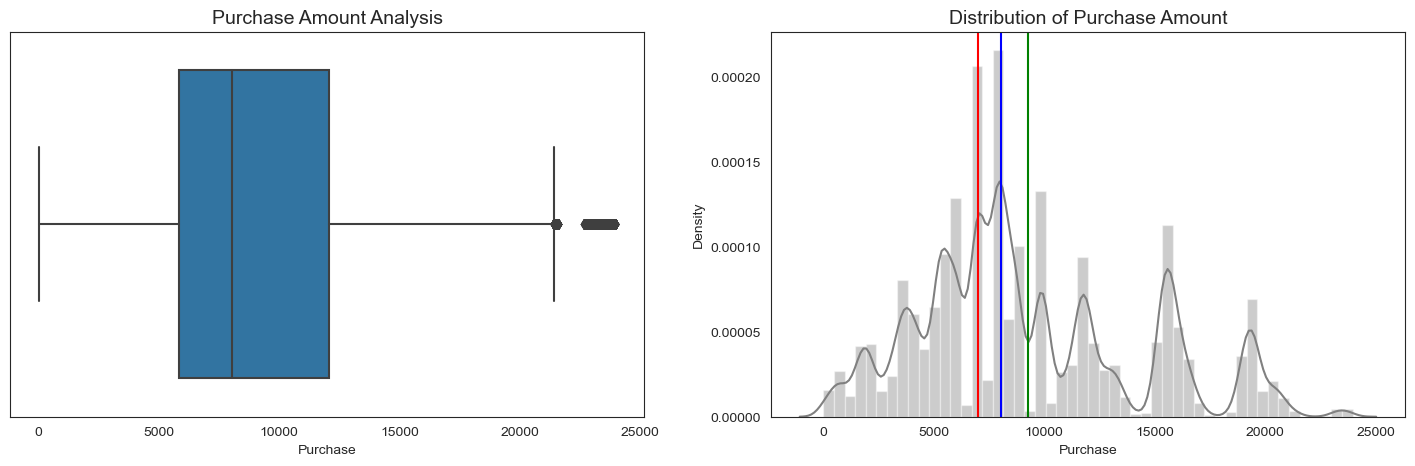

In [21]:
fig = plt.figure(figsize=(18,5))
sns.set_style("white")

plt.subplot(1, 2, 1)
sns.boxplot(data = data, x = "Purchase", orient = "h")

plt.title('Purchase Amount Analysis', fontsize = '14')


plt.subplot(1, 2, 2)
sns.distplot(a = data["Purchase"], color = 'gray')
plt.title("Distribution of Purchase Amount", fontsize = '14')
plt.axvline(data["Purchase"].mean(),color="g")
plt.axvline(data["Purchase"].median(),color="b")
plt.axvline(data["Purchase"].mode()[0],color="r")

plt.show()

In [22]:
print('Mean of Purchase Amount   = ', data["Purchase"].mean())
print('Median of Purchase Amount = ', data["Purchase"].median())

Mean of Purchase Amount   =  9263.968712959126
Median of Purchase Amount =  8047.0


In [24]:
# Clipping data by handling outliers

q1 = data["Purchase"].quantile(0.25)
q3 = data["Purchase"].quantile(0.75)

IQR = q3 - q1
print("1. First Quartile (q1) = ", q1)
print("2. Third Quartile (q2) = ", q3)
print("3. IQR                 = ", IQR)

1. First Quartile (q1) =  5823.0
2. Third Quartile (q2) =  12054.0
3. IQR                 =  6231.0


In [25]:
data_copy = data.copy()

# walmart_new = walmart_new.loc[(walmart_new["Purchase"] > q1 - 1.5*IQR) & (walmart_new["Purchase"] < q3 + 1.5*IQR)]
data_copy["Purchase"] = np.clip(data_copy["Purchase"], q1-1.5*IQR, q3 + 1.5*IQR)
data_copy.shape

(550068, 10)

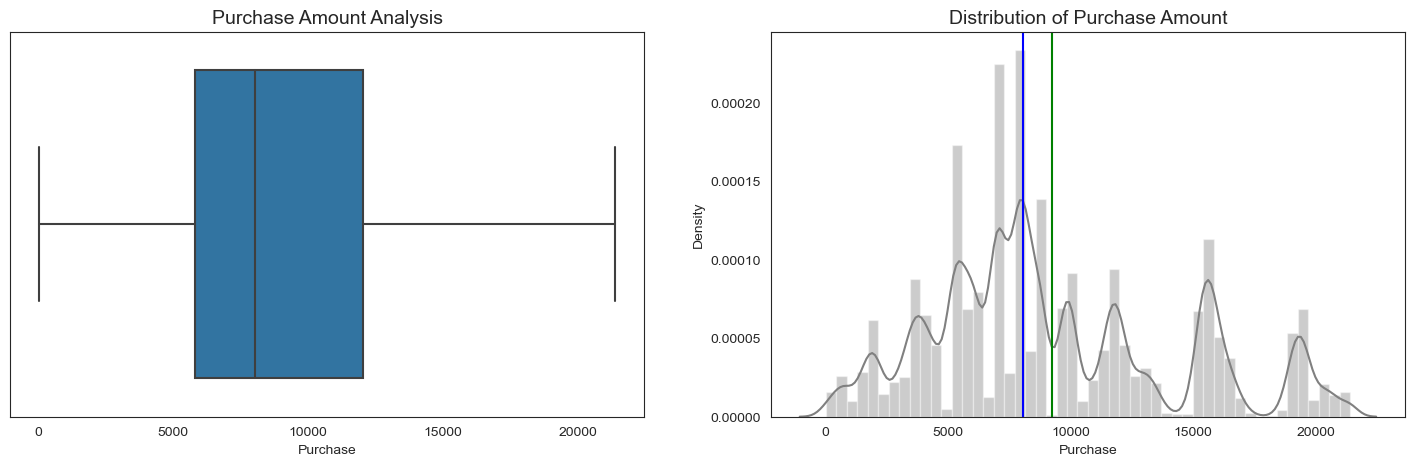

In [26]:
fig = plt.figure(figsize=(18,5))
sns.set_style("white")

plt.subplot(1, 2, 1)
sns.boxplot(data = data_copy, x = "Purchase", orient = "h")

plt.title('Purchase Amount Analysis', fontsize = '14')


plt.subplot(1, 2, 2)
sns.distplot(a = data_copy["Purchase"], color = 'gray')
plt.title("Distribution of Purchase Amount", fontsize = '14')
plt.axvline(data_copy["Purchase"].mean(),color="g")
plt.axvline(data_copy["Purchase"].median(),color="b")

plt.show()

In [107]:
print('Mean of Purchase Amount   = ', data_copy["Purchase"].mean())
print('Median of Purchase Amount = ', data_copy["Purchase"].median())

Mean of Purchase Amount   =  9255.02429608703
Median of Purchase Amount =  8047.0


Univariate Categorical Variable Analysis

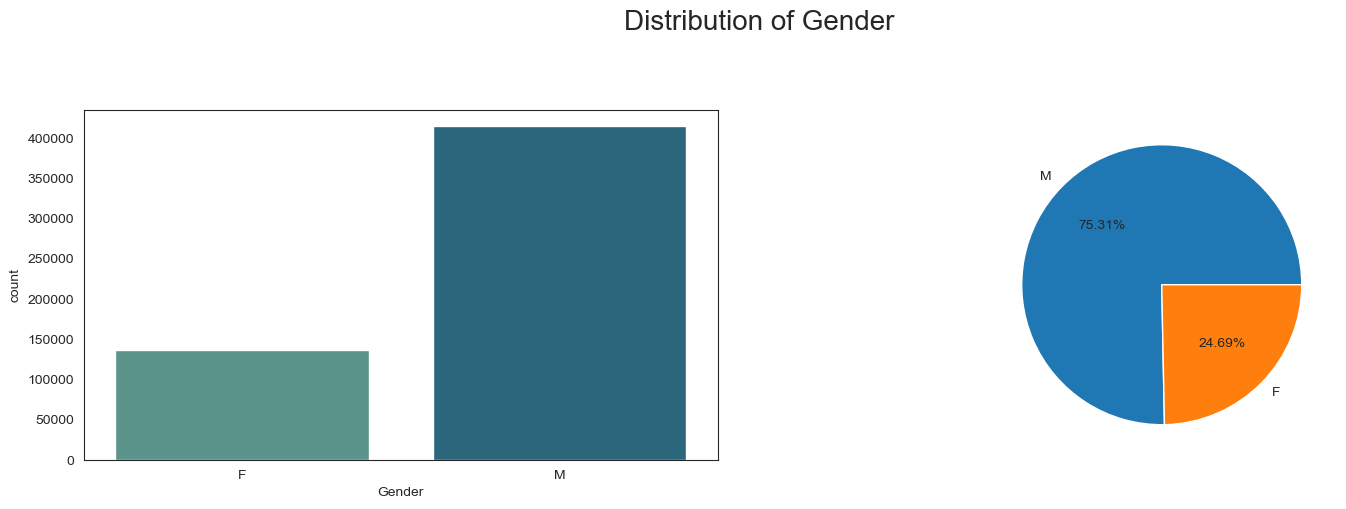

In [111]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=data_copy, x="Gender", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(data_copy["Gender"].value_countsounts(), 
        labels = data_copy["Gender"].value_counts().index, 
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Gender', fontsize = 20)

plt.show()

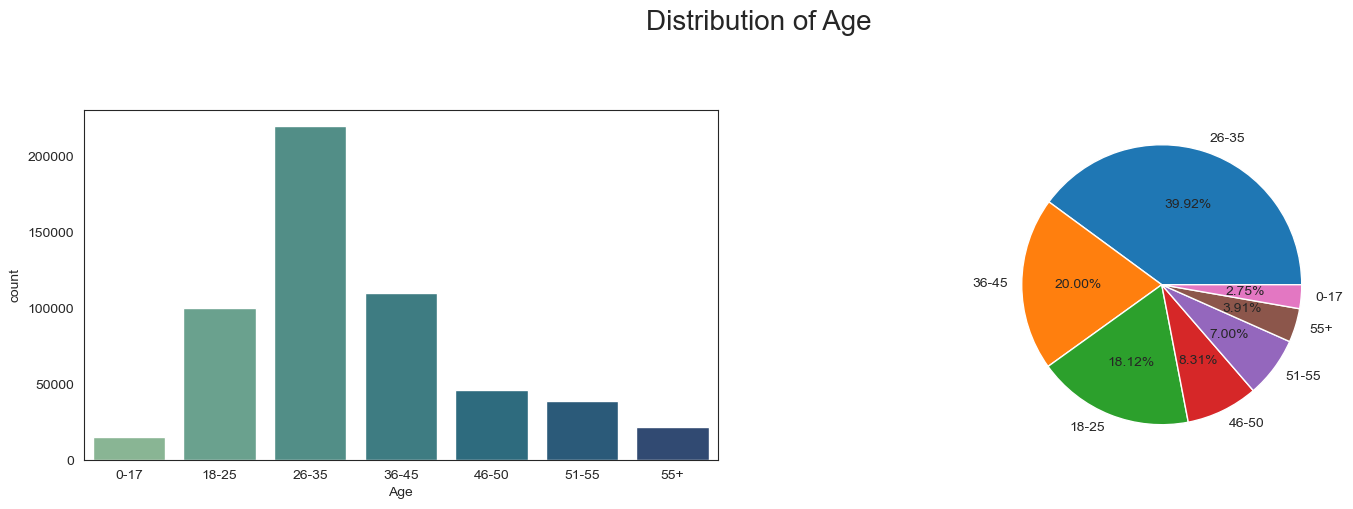

In [28]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=data_copy, x="Age", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(data_copy["Age"].value_counts(), 
        labels = data_copy["Age"].value_counts().index, 
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Age', fontsize = 20)

plt.show()

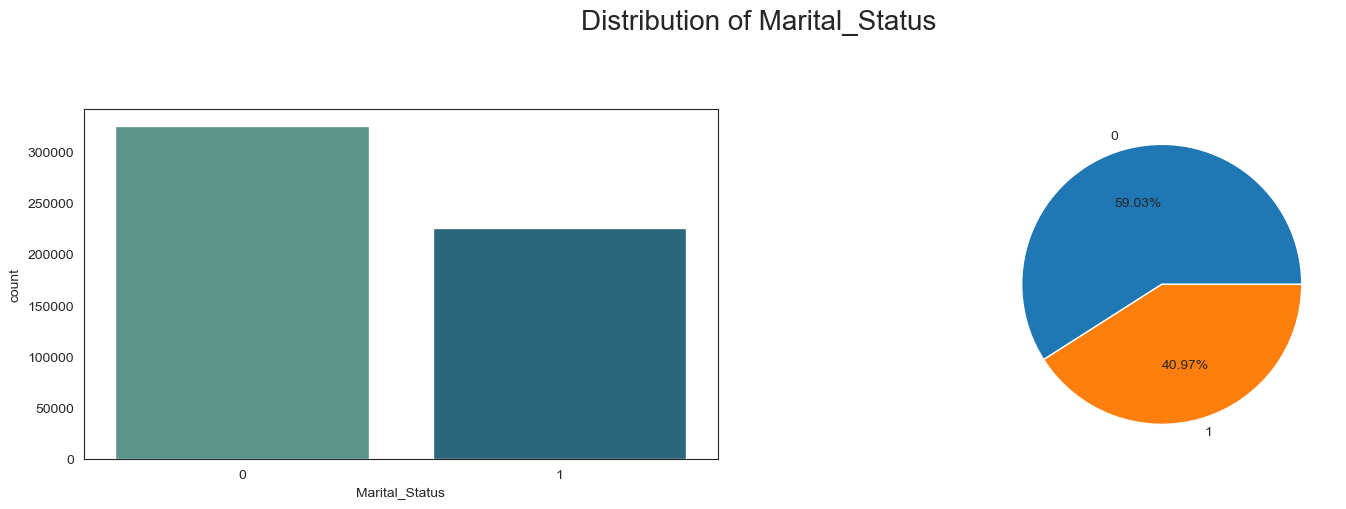

In [29]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=data_copy, x="Marital_Status", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(data_copy["Marital_Status"].value_counts(), 
        labels = data_copy["Marital_Status"].value_counts().index, 
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Marital_Status', fontsize = 20)

plt.show()

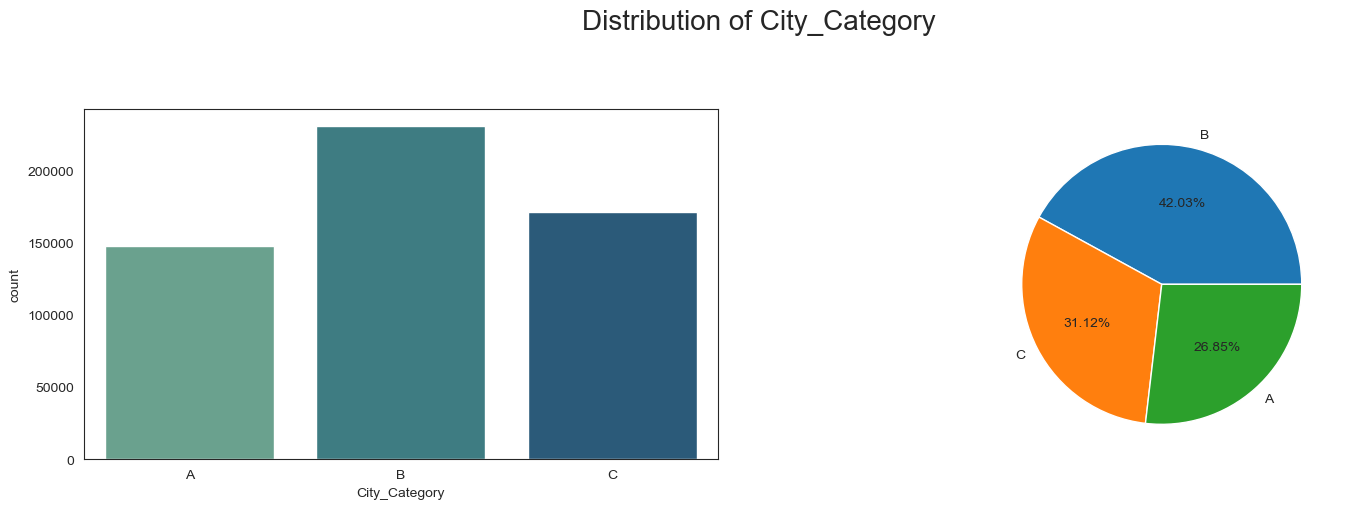

In [30]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=data_copy, x="City_Category", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(data_copy["City_Category"].value_counts(), 
        labels = data_copy["City_Category"].value_counts().index, 
        autopct = '%1.2f%%')
plt.suptitle('Distribution of City_Category', fontsize = 20)

plt.show()

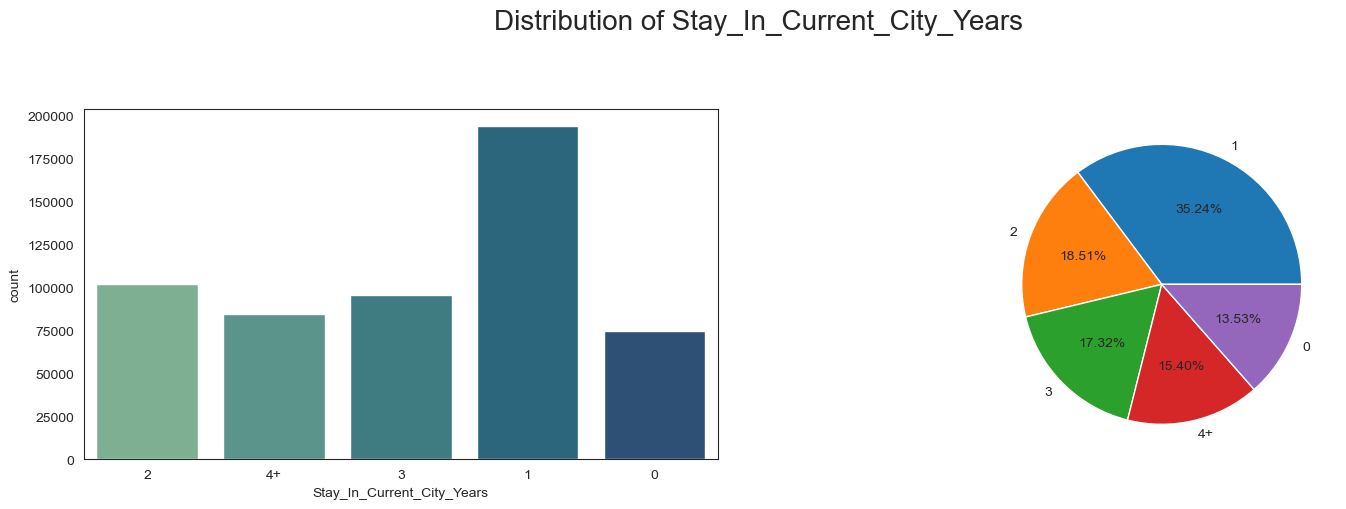

In [31]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=data_copy, x="Stay_In_Current_City_Years", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(data_copy["Stay_In_Current_City_Years"].value_counts(), 
        labels = data_copy["Stay_In_Current_City_Years"].value_counts().index, 
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Stay_In_Current_City_Years', fontsize = 20)
plt.show()

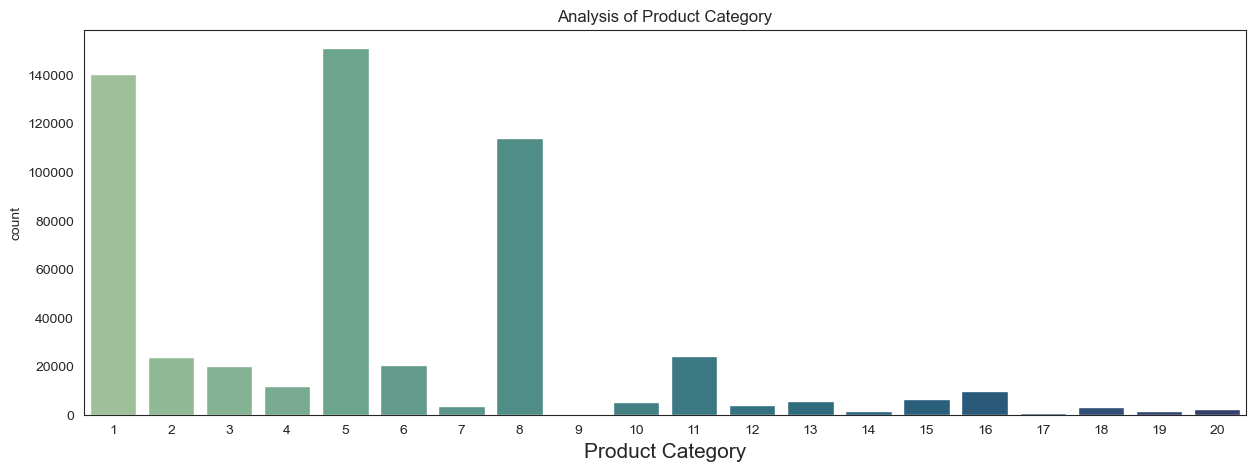

In [32]:
fig = plt.figure(figsize = (15,5))

sns.countplot(data = data_copy, x = "Product_Category", palette="crest")
plt.xlabel("Product Category", fontsize = 15)
plt.title("Analysis of Product Category")
plt.show()

Bi-variate Analysis

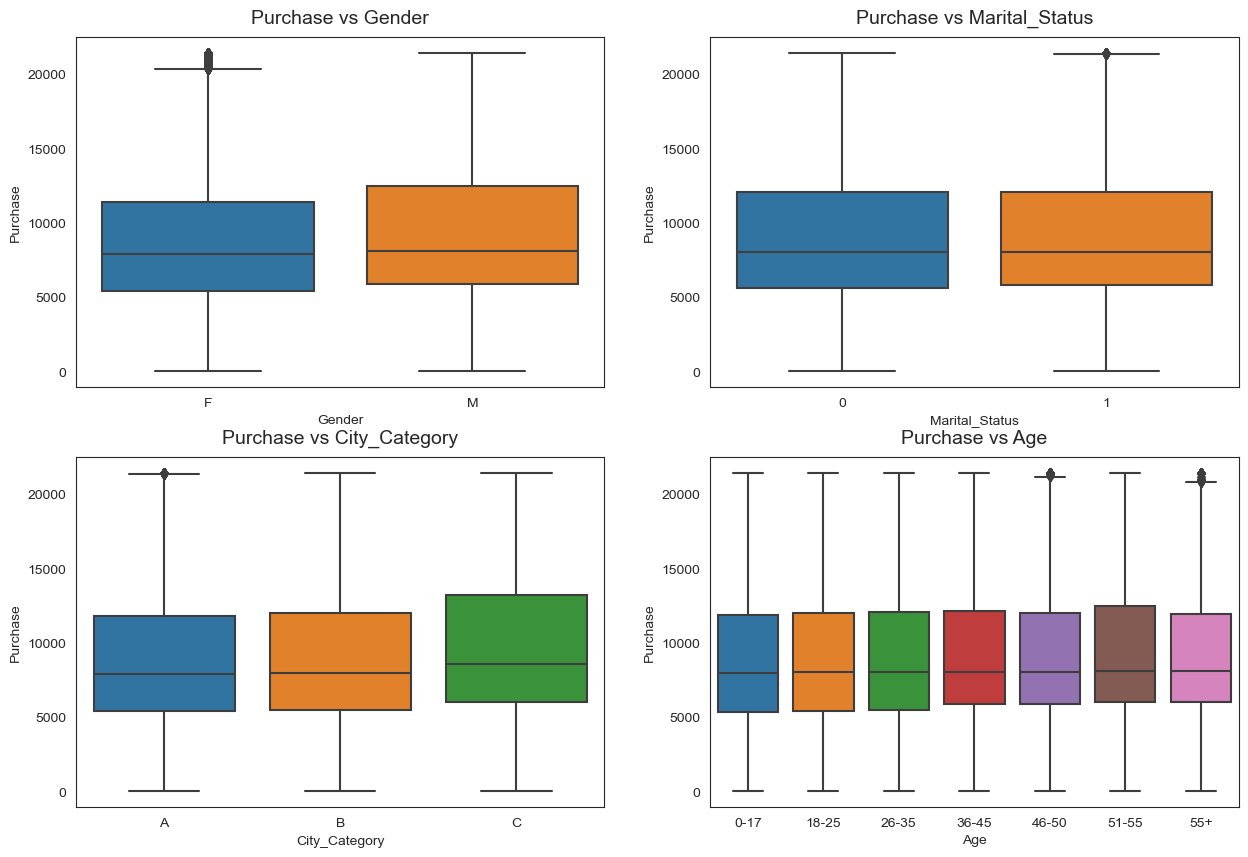

In [33]:
cat_col = ["Gender", "Marital_Status", "City_Category", "Age"]

fig, axs = plt.subplots(nrows=2, ncols = 2, figsize=(15,10))
k = 0
sns.set_style("dark")
for i in range(2):
    for j in range(2):
        sns.boxplot(data=data_copy, x=cat_col[k], y="Purchase", ax=axs[i, j])
        axs[i, j].set_title("Purchase vs " + cat_col[k], pad = 10, fontsize = 14)
        k += 1
plt.show()

# Data Exploration

What products are different age groups buying?

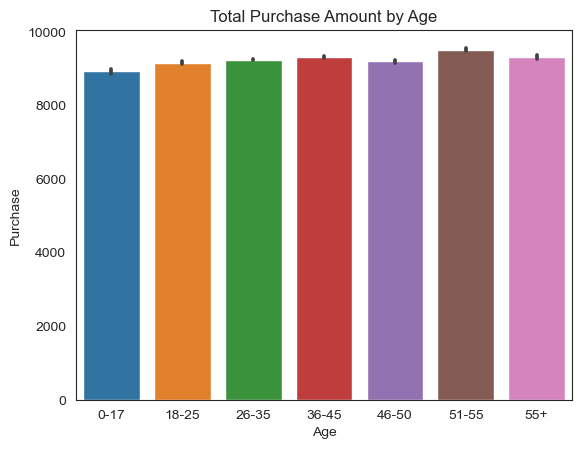

In [114]:
sns.barplot(data=data_copy, x='Age', y='Purchase')
plt.title('Total Purchase Amount by Age')
plt.show()

Is there a relationship between age, marital status, and the amount spent?

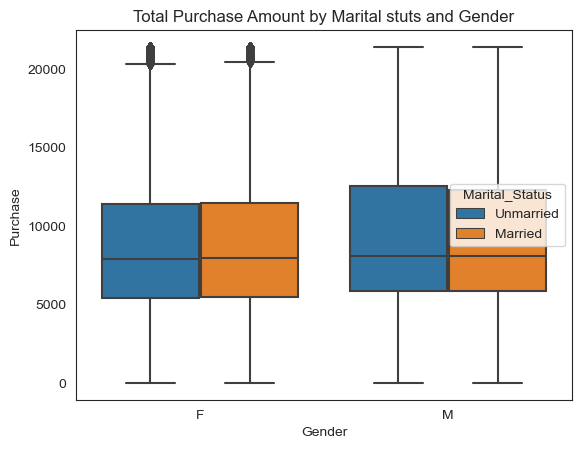

In [112]:
# Multivariate Analysis

sns.boxplot(data=data_copy, y='Purchase', x='Gender', hue='Marital_Status')
plt.title('Total Purchase Amount by Marital stuts and Gender')
plt.show()

Are there preferred product categories for different genders?

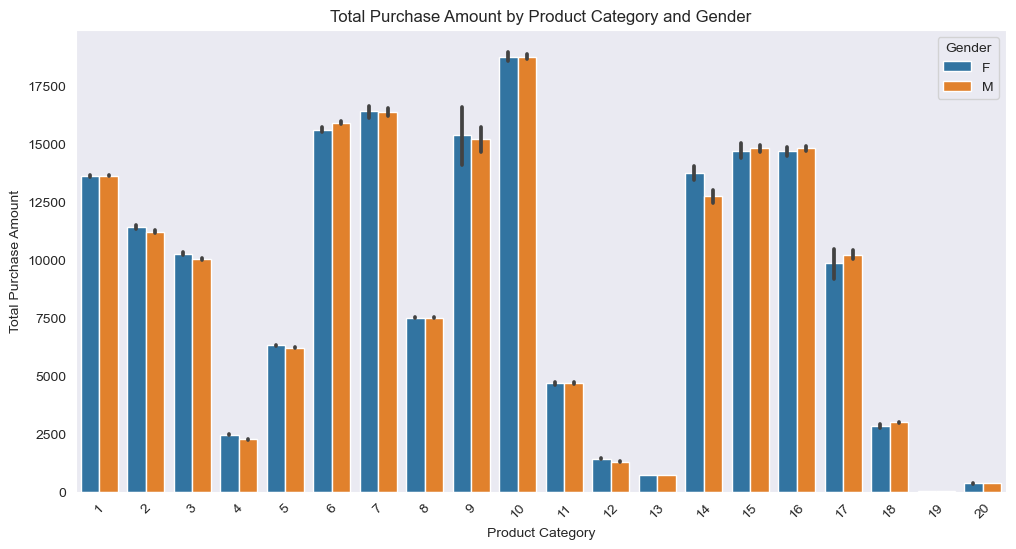

In [36]:
# Group the data by gender and product category
grouped_data = data_copy.groupby(['Gender', 'Product_Category'])['Purchase'].sum().reset_index()

# Visualize the data using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=data_copy, x='Product_Category', y='Purchase', hue='Gender')
plt.title('Total Purchase Amount by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

4. How does gender affect the amount spent?

In [37]:
data_smp_male = data_copy[data_copy['Gender'] == 'M']['Purchase']
data_smp_female = data_copy[data_copy['Gender'] == 'F']['Purchase']

print("Male Customers : ",data_smp_male.shape[0])
print("Female Customers : ",data_smp_female.shape[0])

Male Customers :  414259
Female Customers :  135809


In [38]:
## Bootstrap functin for calculating CI
def bootstrapping(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)
    
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"Sample Size: {smp_siz}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)},Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}",
              fontsize=14,family = "Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')
    
    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

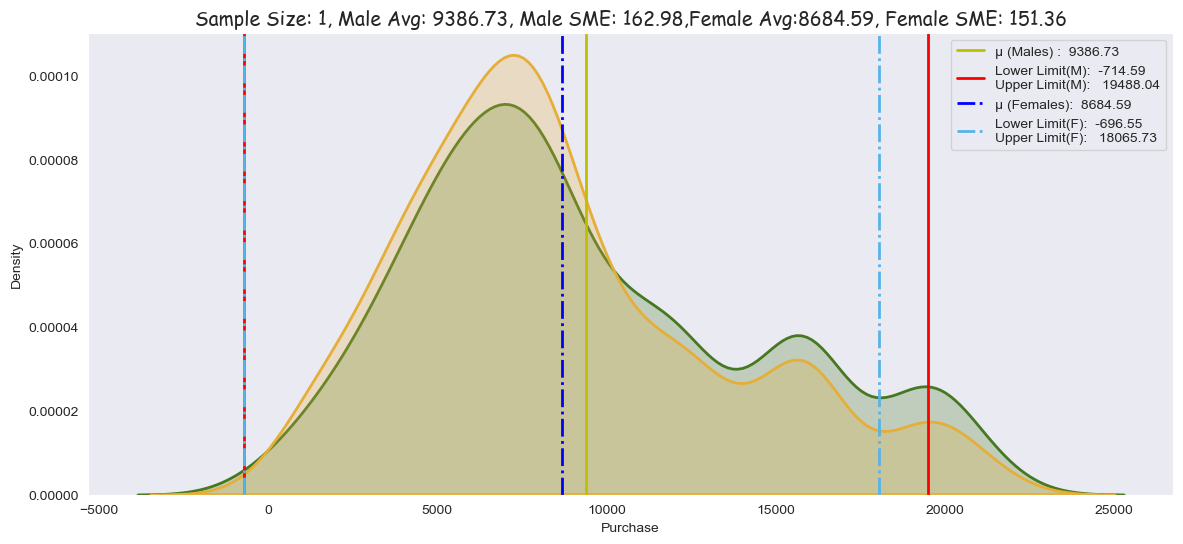

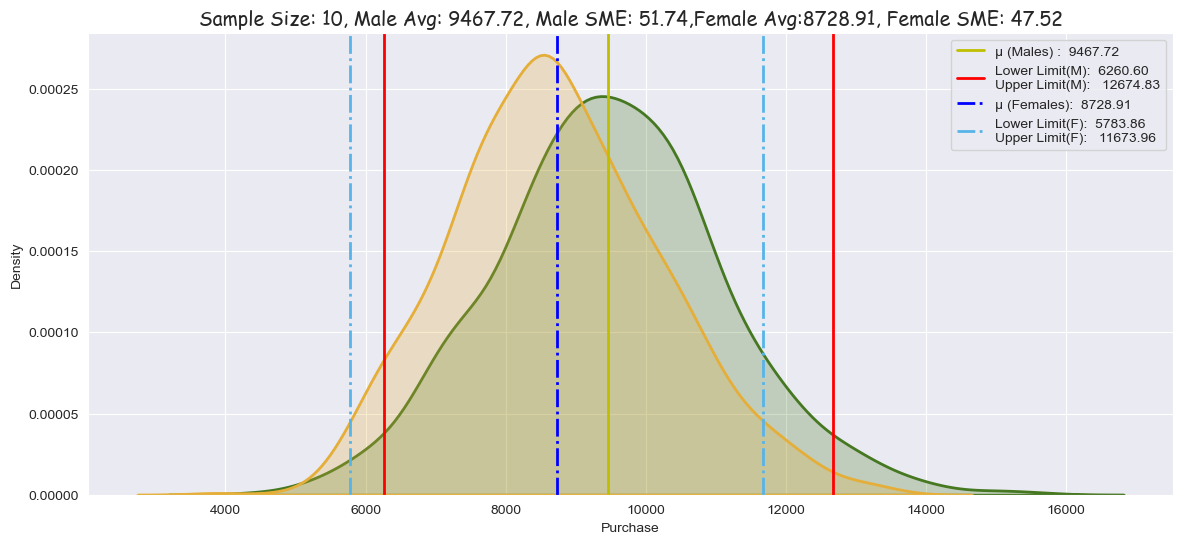

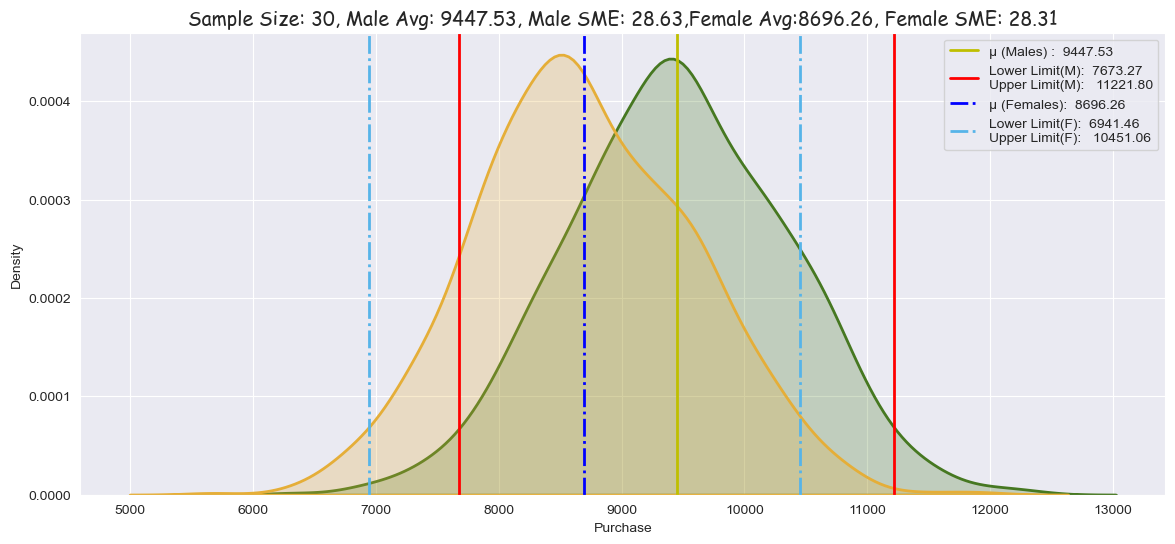

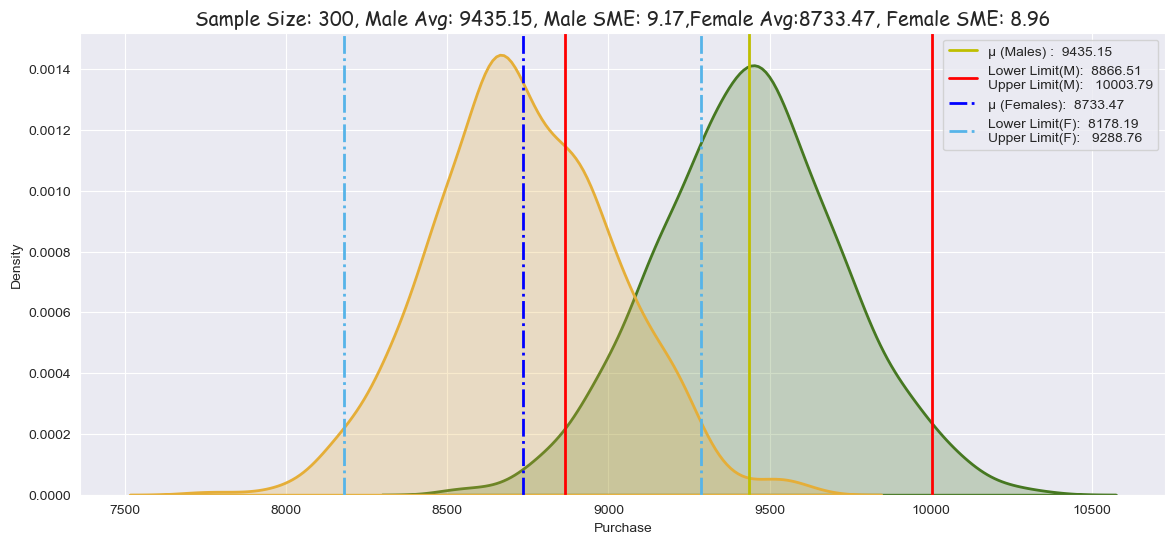

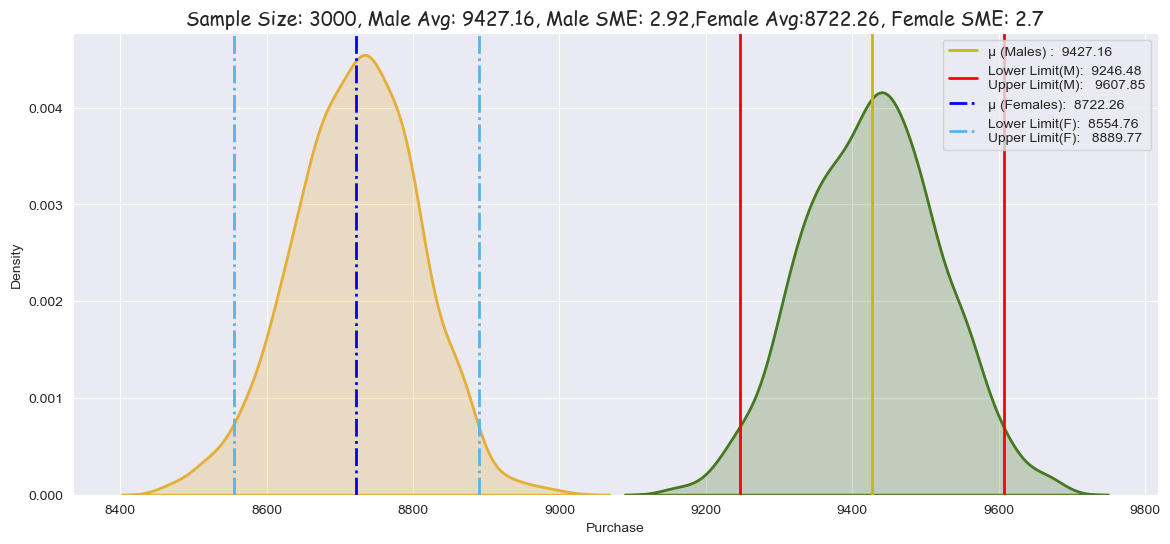

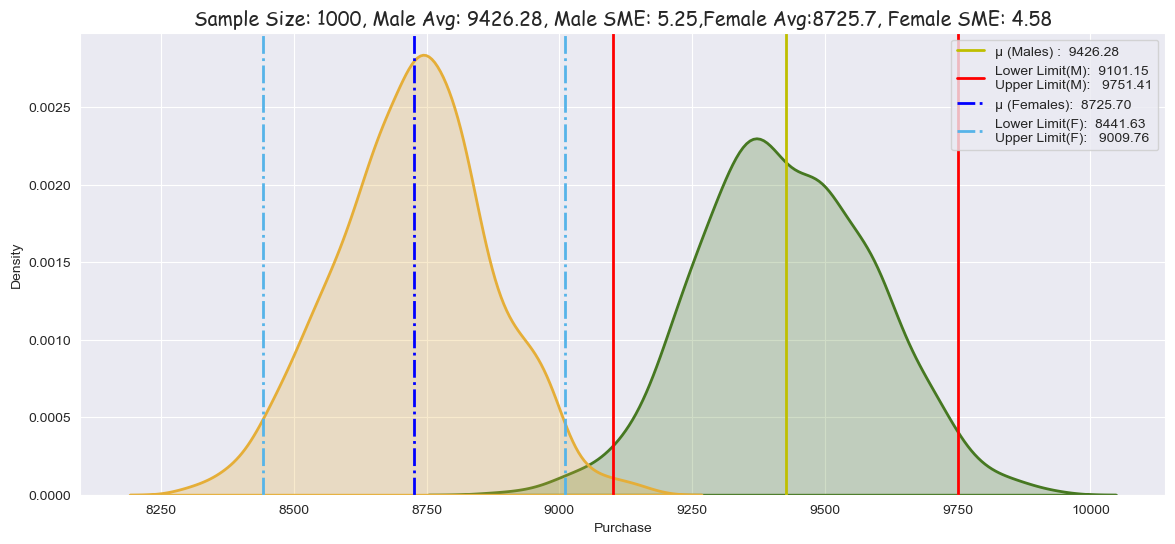

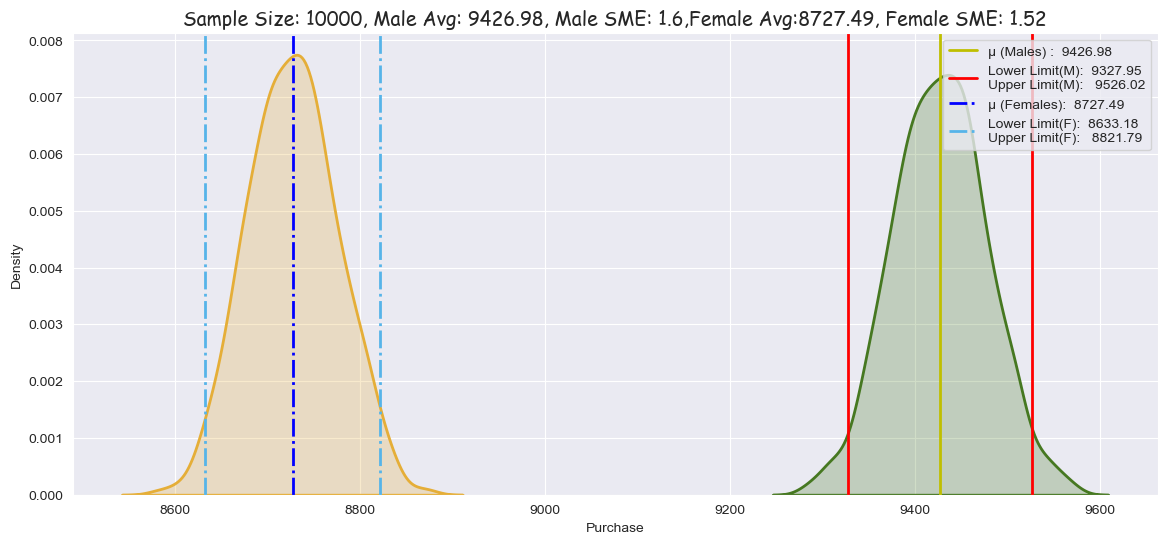

In [39]:
itr_size = 1000
size_list = [1, 10, 30, 300, 3000, 1000, 10000]
ci = 0.95

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(data_smp_male,data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),95]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
overlap_95 = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
overlap = pd.concat([overlap, overlap_95], axis=0)


In [40]:
overlap_95.loc[(overlap_95['Gender'] == 'M') & (overlap_95['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                   CI    Range  \
6       M     8866.51    10003.79         300  [8866.51, 10003.79]  1137.28   
8       M     9246.48     9607.85        3000   [9246.48, 9607.85]   361.37   
10      M     9101.15     9751.41        1000   [9101.15, 9751.41]   650.26   
12      M     9327.95     9526.02       10000   [9327.95, 9526.02]   198.07   

   Confidence_pct  
6              95  
8              95  
10             95  
12             95

In [41]:
overlap_95.loc[(overlap_95['Gender'] == 'F') & (overlap_95['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI    Range  \
7       F     8178.19     9288.76         300  [8178.19, 9288.76]  1110.57   
9       F     8554.76     8889.77        3000  [8554.76, 8889.77]   335.01   
11      F     8441.63     9009.76        1000  [8441.63, 9009.76]   568.13   
13      F     8633.18     8821.79       10000  [8633.18, 8821.79]   188.61   

   Confidence_pct  
7              95  
9              95  
11             95  
13             95

Using confidence interval 95%, the inference of the mean purchase value by gender

As the sample size increases, the Male and female groups start to become distinct

With increasing sample size, Standard error of the mean in the samples decreases.

For Female (sample size 100000) range for mean purchase with confidence interval 95% is [8632.86, 8819.36]

For Male range for mean purchase with confidence interval 95% is [9330.27, 9528.62]

Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

5. How does Marital_Status affect the amount spent?

In [42]:
data_copy['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
data_copy['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [43]:
data_copy.sample(500,replace=True).groupby(['Marital_Status'])['Purchase'].describe()

count       mean          std    min      25%     50%  \
Marital_Status                                                          
Unmarried       300.0  9224.4550  4777.176042   60.0  5939.50  8059.0   
Married         200.0  9294.9825  5109.767785  575.0  5823.75  7965.0   

                     75%      max  
Marital_Status                     
Unmarried       11921.75  21400.5  
Married         11838.75  21400.5

In [44]:
data_smp_married = data_copy[data_copy['Marital_Status'] == 'Married']['Purchase']
data_smp_unmarried = data_copy[data_copy['Marital_Status'] == 'Unmarried']['Purchase']

In [49]:
## Bootstrap func for calculating CI
def bootstrapping_m_vs_um(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)

#     std_dev1 = np.std(sample1)
#     std_err1 = np.std(sample1,ddof=1)/np.sqrt(smp_siz)
#     std_dev2 = np.std(sample2)
#     std_err2 = np.std(sample2,ddof=1)/np.sqrt(smp_siz)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)

#     print(smp_siz,std_dev1,std_err1,sem1)
#     print(smp_siz,std_dev2,std_err2,sem2)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)
    
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"Sample Size: {smp_siz}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)},Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}",
              fontsize=14,family = "Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

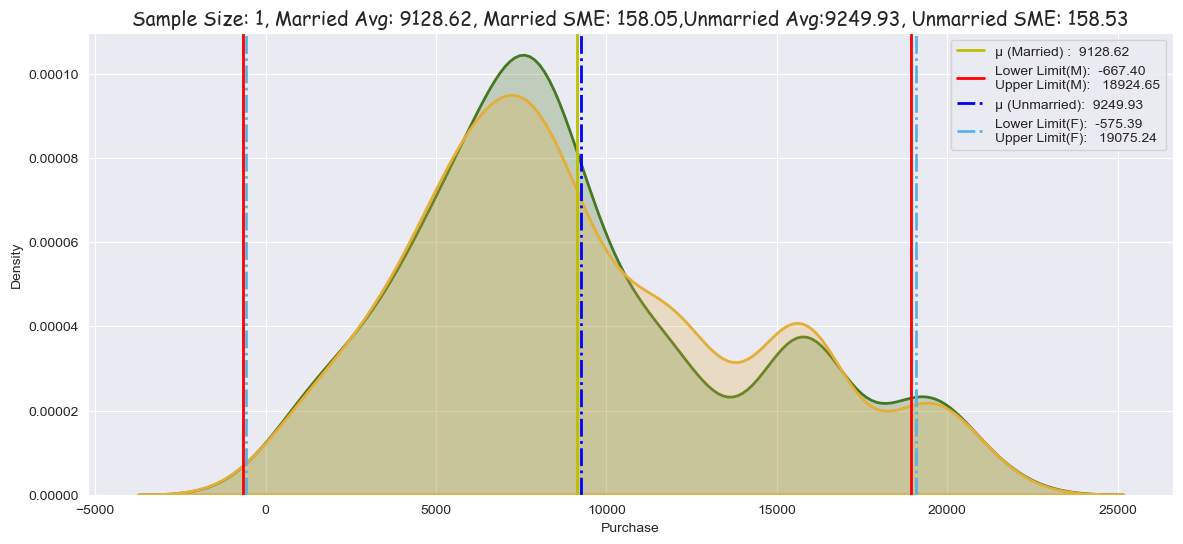

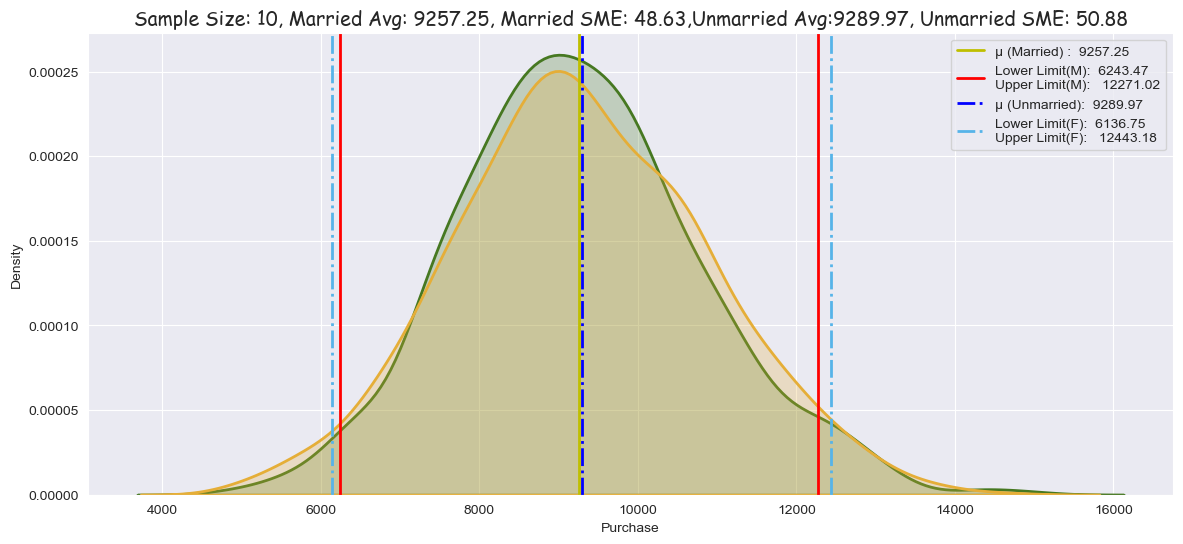

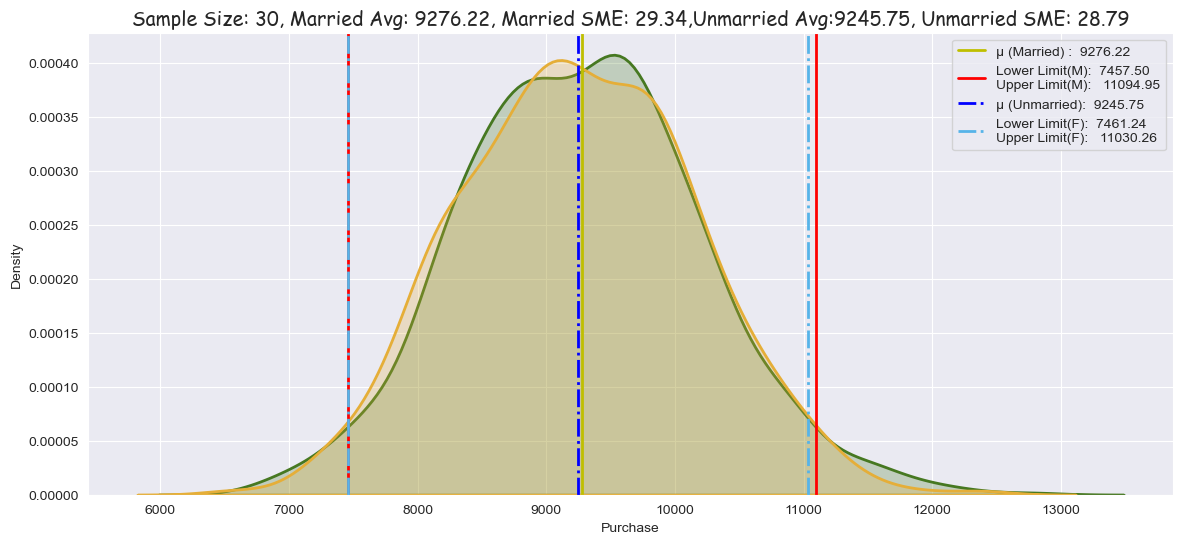

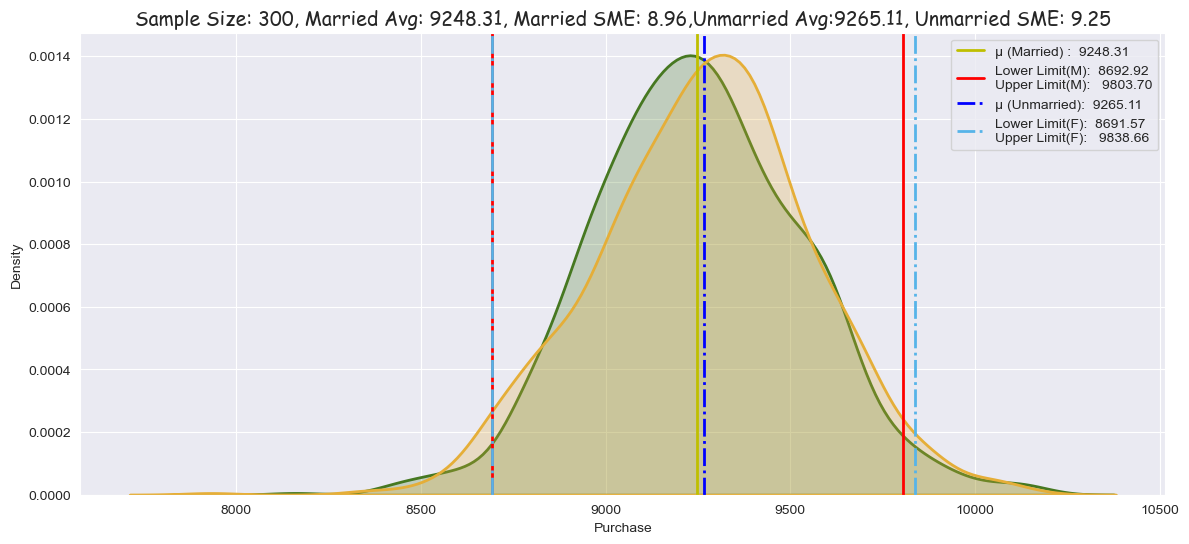

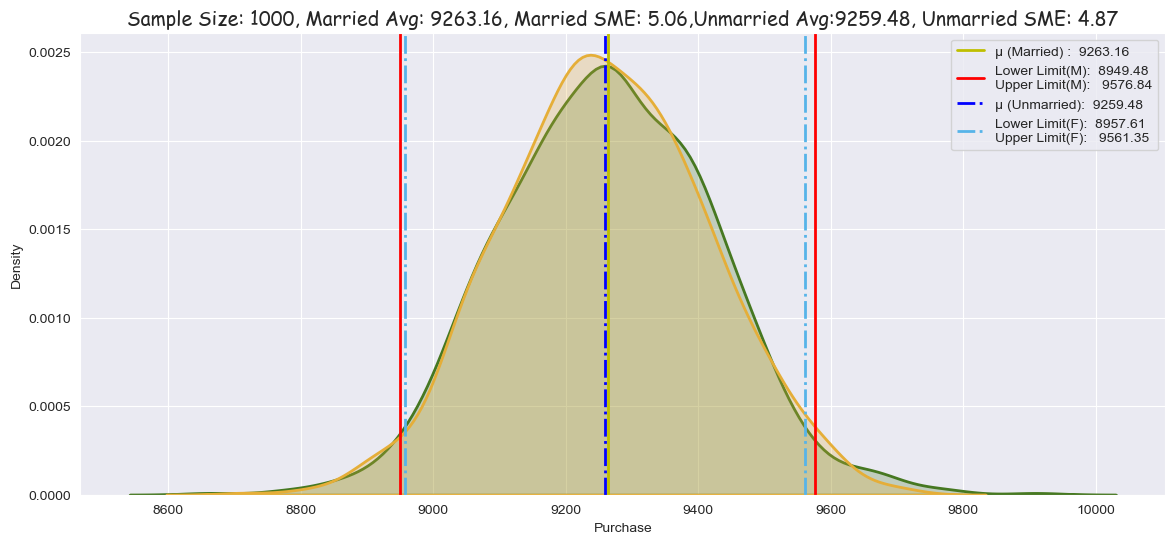

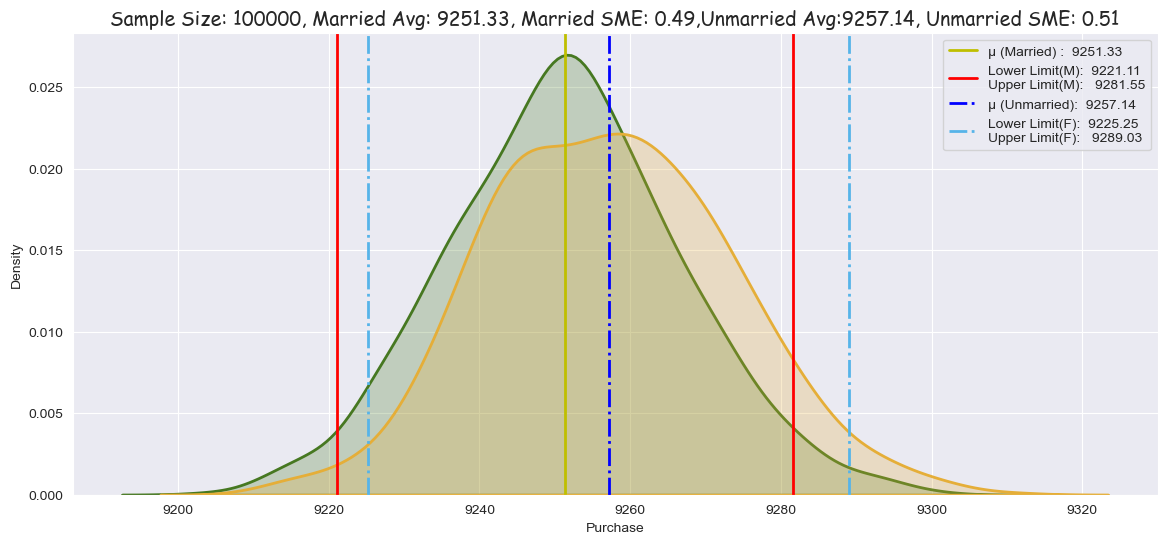

In [50]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.95

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_m_vs_um(data_smp_married,data_smp_unmarried,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['Married', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)
    array = np.append(array, np.array([['Unmarried', ll_u, ul_u, smp_siz, ([ll_u,ul_u]) ,(ul_u-ll_u),95]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [51]:
overlap.loc[(overlap['Marital_Status'] == 'Married') & (overlap['Sample_Size'] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                  CI  \
6         Married     8692.92      9803.7         300   [8692.92, 9803.7]   
8         Married     8949.48     9576.84        1000  [8949.48, 9576.84]   
10        Married     9221.11     9281.55      100000  [9221.11, 9281.55]   

      Range Confidence_pct  
6   1110.78             95  
8    627.36             95  
10    60.44             95

In [52]:
overlap.loc[(overlap['Marital_Status'] == 'Unmarried') & (overlap['Sample_Size'] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                  CI  \
7       Unmarried     8691.57     9838.66         300  [8691.57, 9838.66]   
9       Unmarried     8957.61     9561.35        1000  [8957.61, 9561.35]   
11      Unmarried     9225.25     9289.03      100000  [9225.25, 9289.03]   

      Range Confidence_pct  
7   1147.09             95  
9    603.74             95  
11    63.78             95

Overlapping is evident for married vs un-married customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.

For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 95% is [9225.25, 9289.03]

For married customer range for mean purchase with confidence interval 95% is [9221.11, 9281.55]

6. How does Age affect the amount spent?

In [62]:
age_data = data_copy.groupby(["Age"])["Purchase"].describe()
age_data

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8925.539597  5090.078414  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9164.189554  5019.866472  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9244.947060  4990.086124  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9320.888550  4995.487782  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9198.531093  4940.249496  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9519.560427  5048.447704  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9319.768741  4968.014656  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   21400.5  
18-25  21400.5  
26-35  21400.5  
36-45  21400.5  
46-50  21400.5  
51-55  21400.5  
55+    21400.5

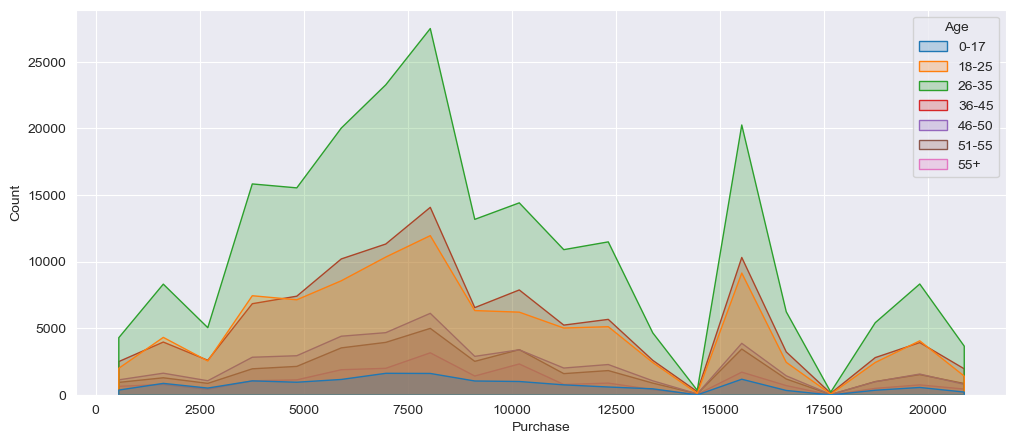

In [66]:
plt.figure(figsize = (12, 5))

sns.histplot(data = data_copy, x = "Purchase", bins = 20, hue = "Age", element="poly")
plt.show()

In [76]:
## Bootstrap Func
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.95,age= "0-17", no_of_tails=2):
    
    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = statistics.stdev(smp_means_m)
    sem   = stats.sem(smp_means_m)
    
    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)
       
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp_means_m,color="#7A68A6",fill=True,linewidth=2)
    
    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))
    
    plt.title(f"{confidence_level * 100} CI on sample size {smp_siz} on age bracket {age}")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp_means_m ,np.round(lower_limit,2),np.round(upper_limit,2)

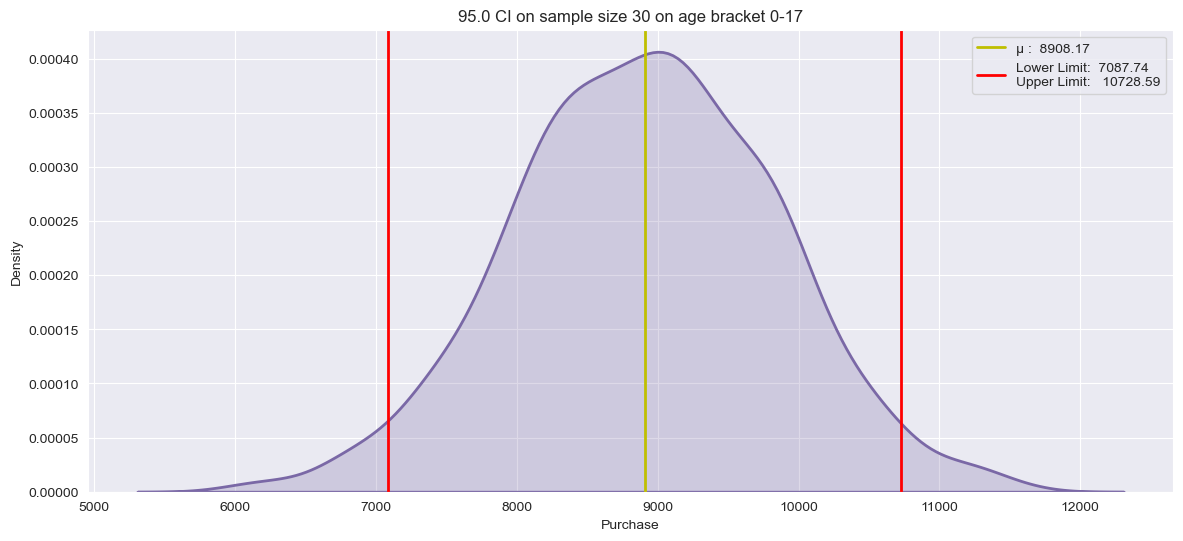

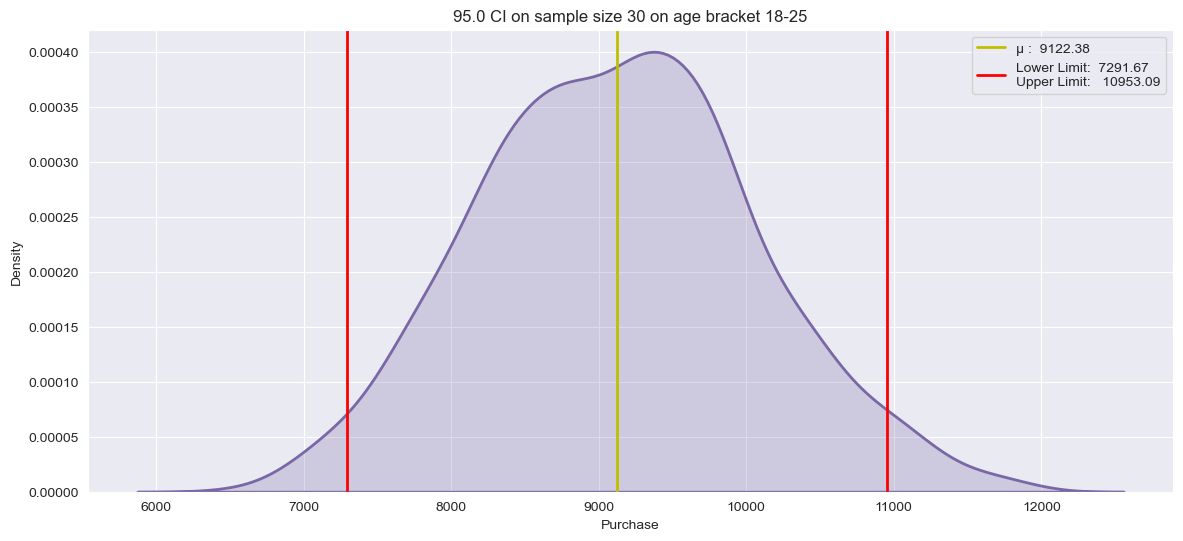

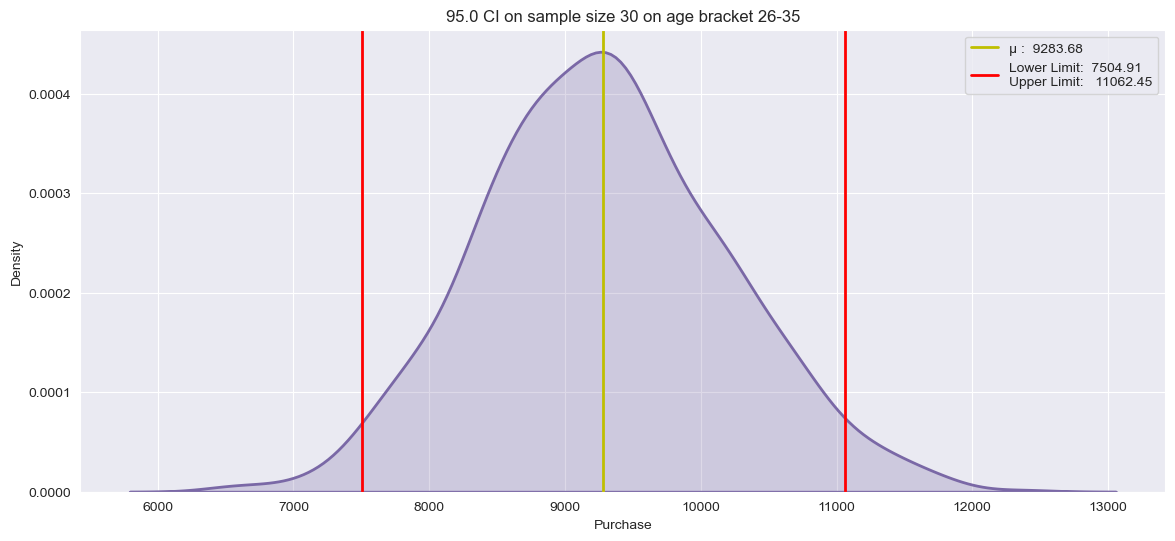

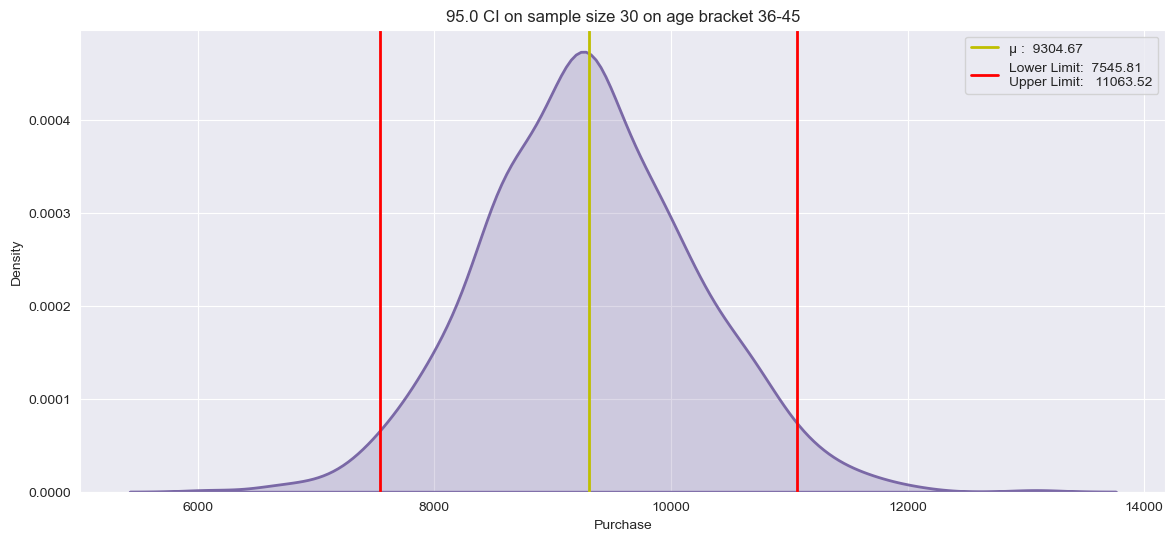

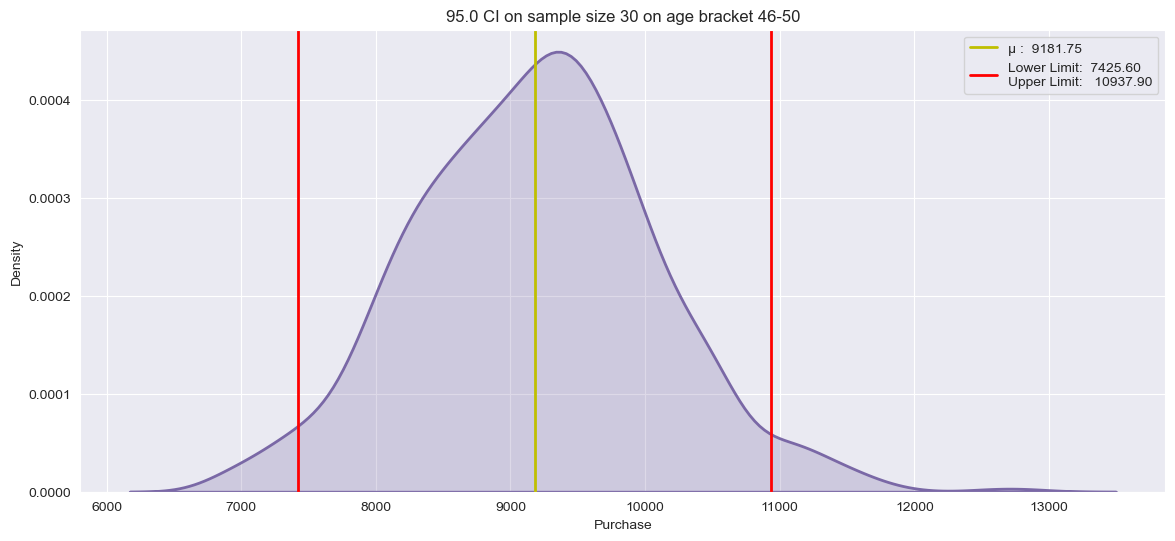

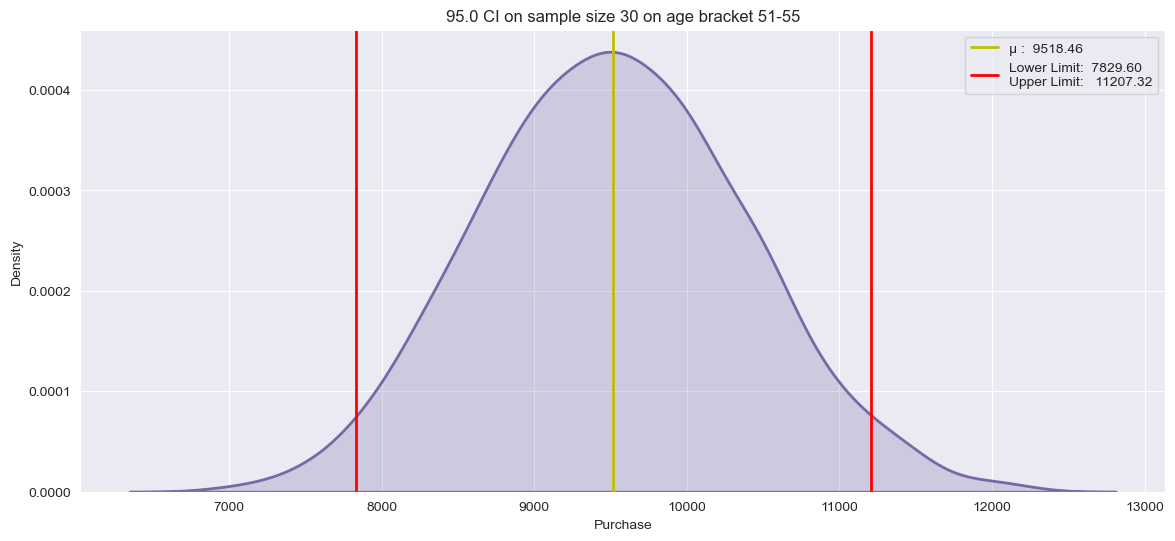

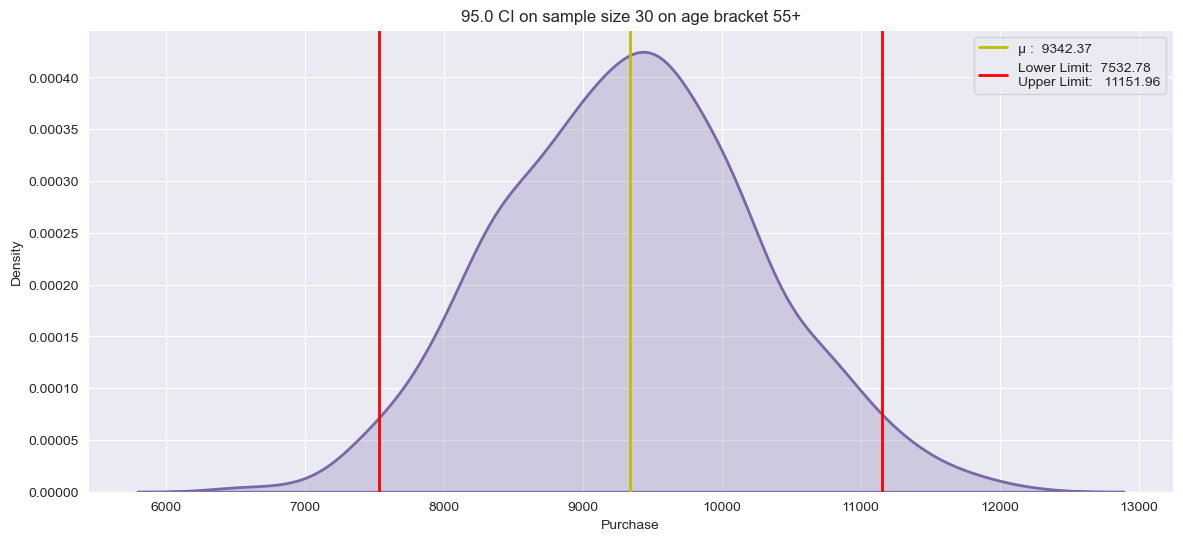

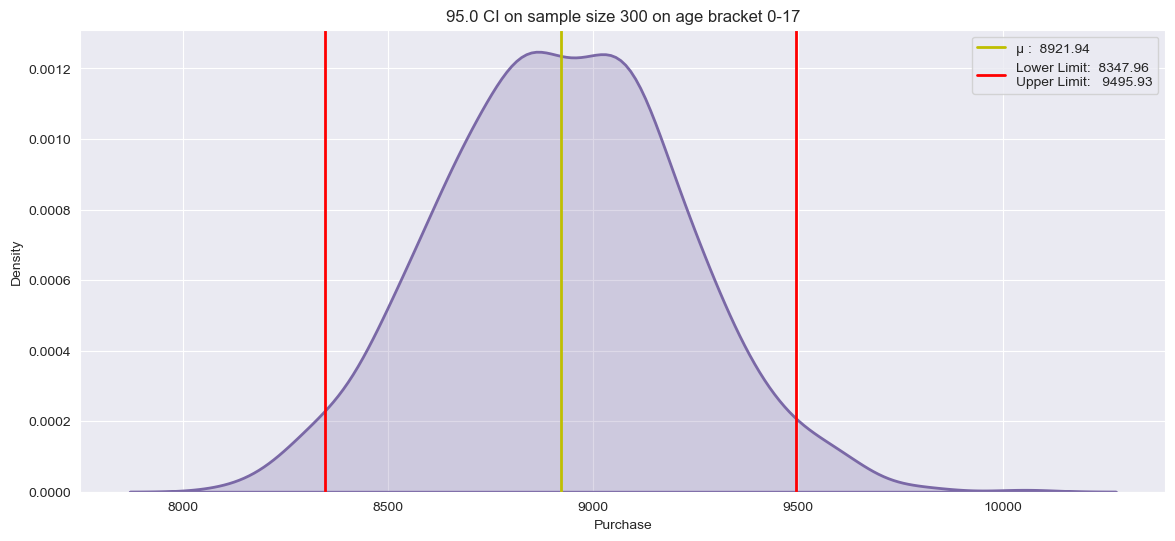

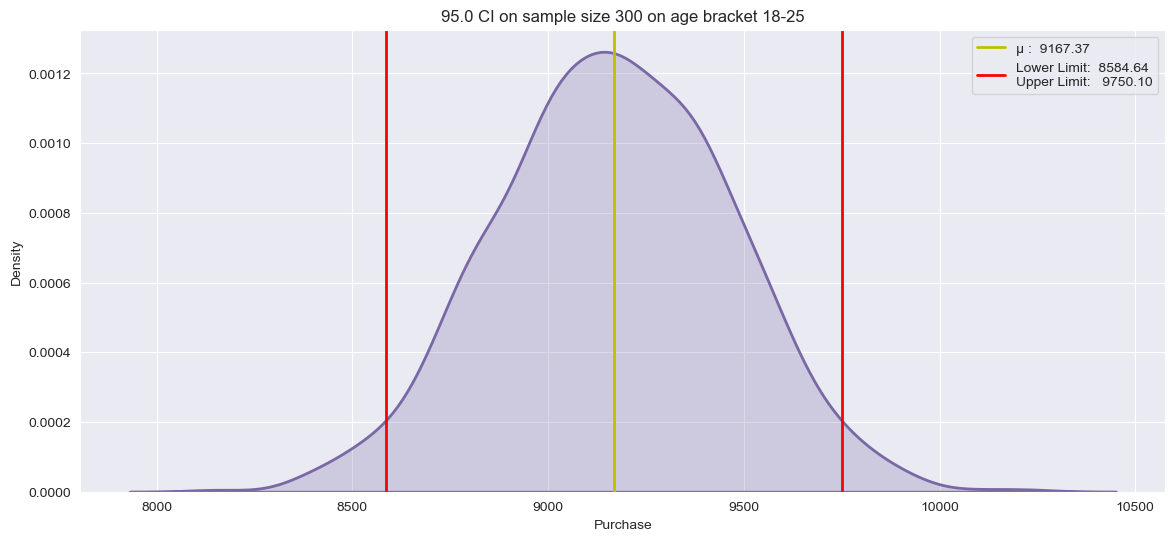

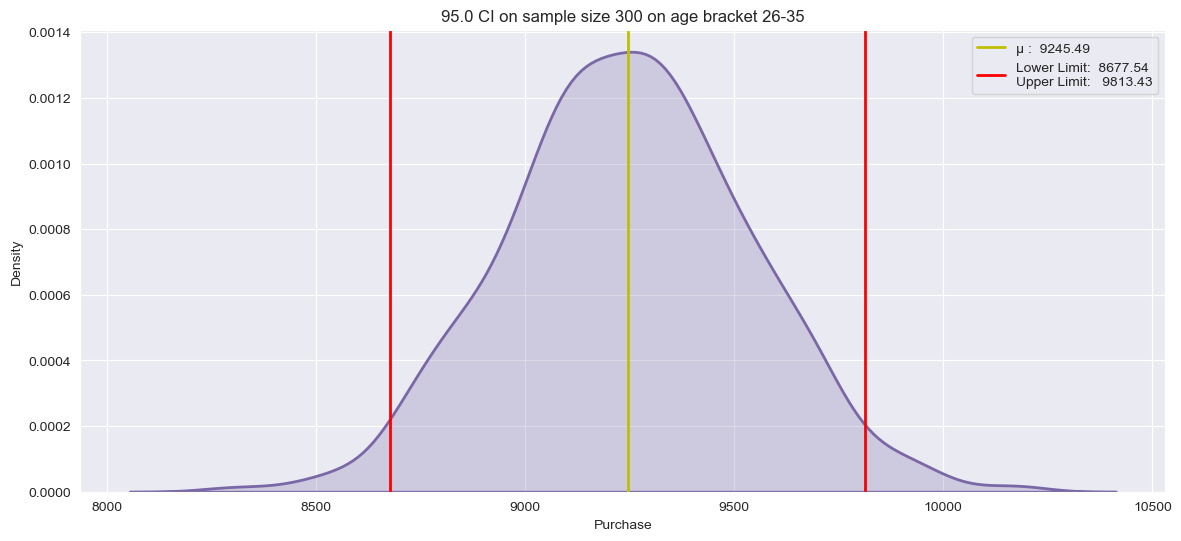

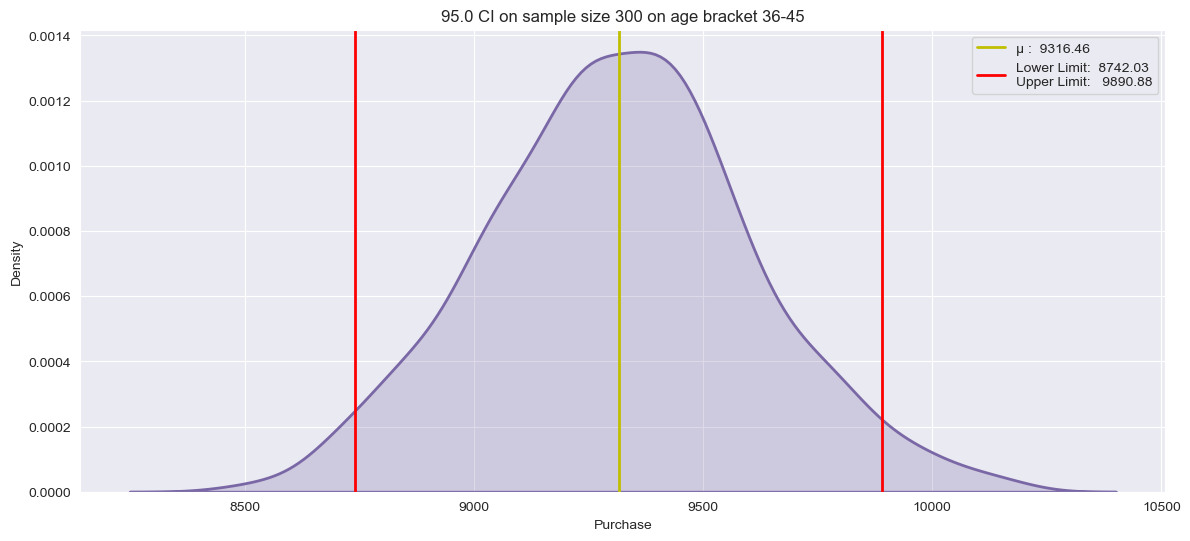

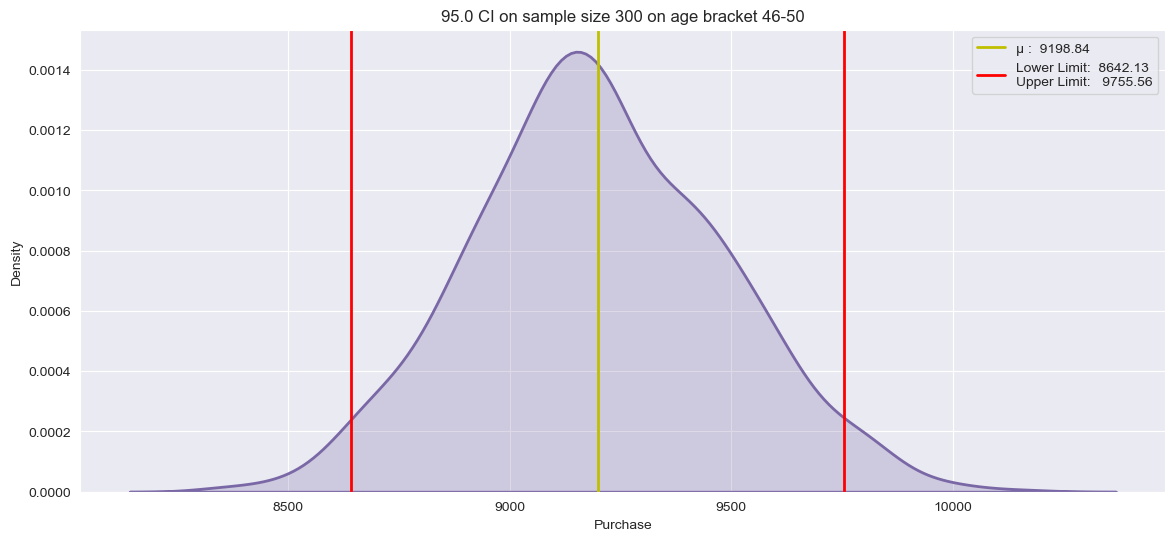

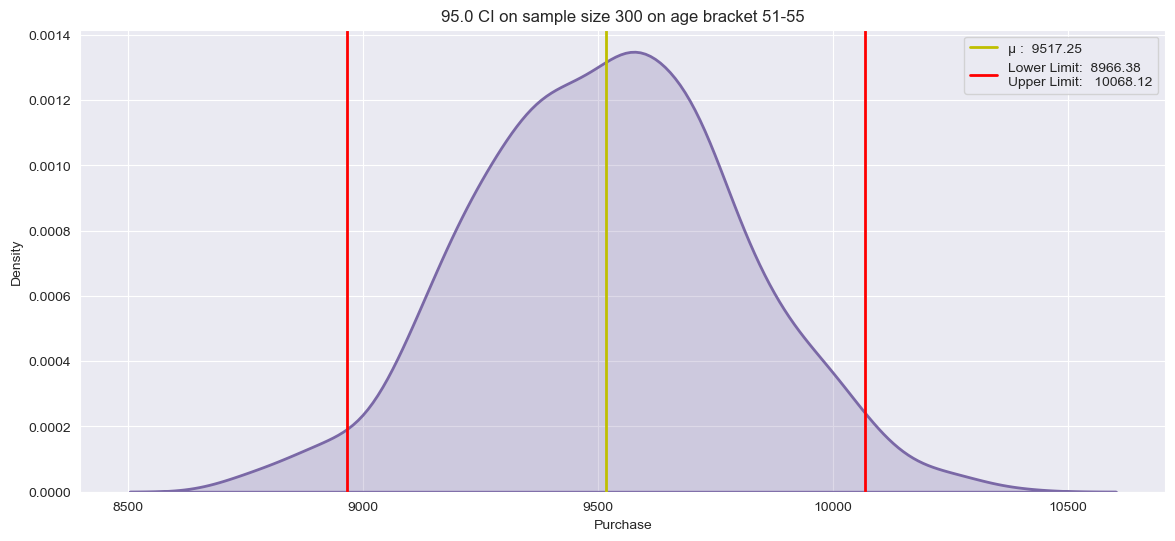

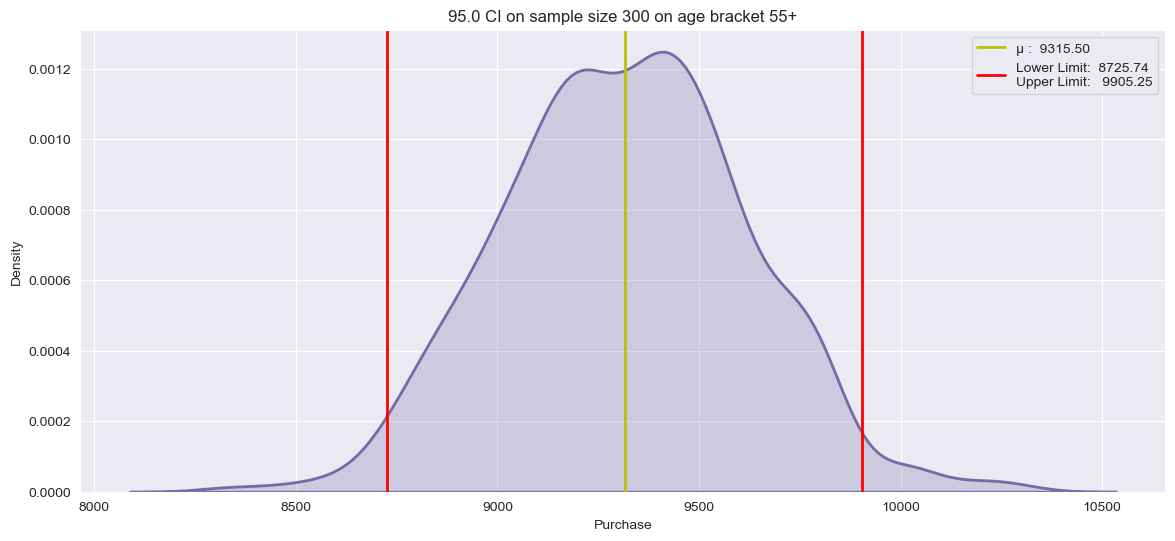

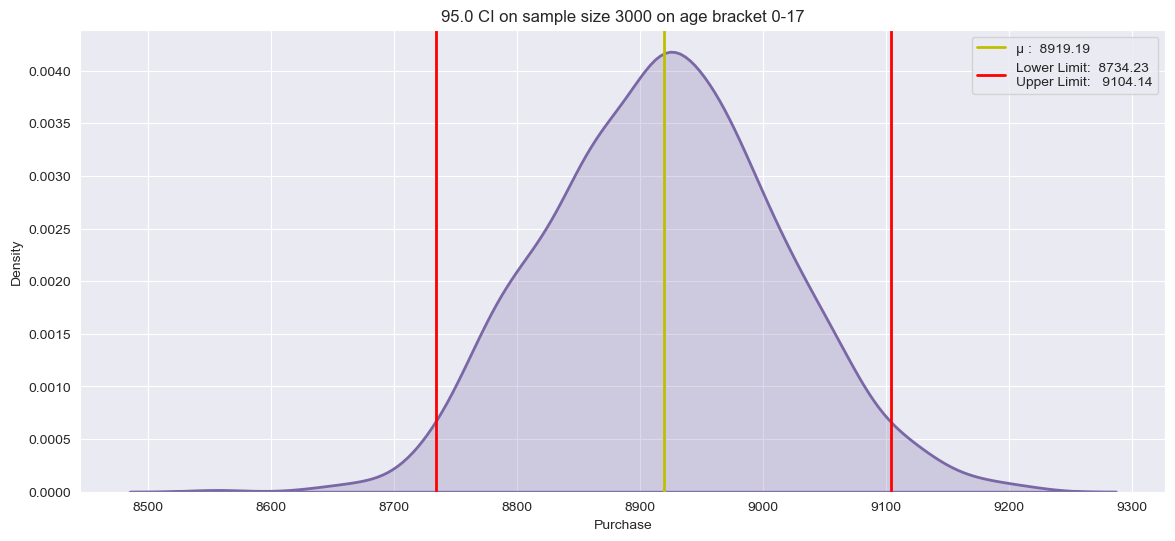

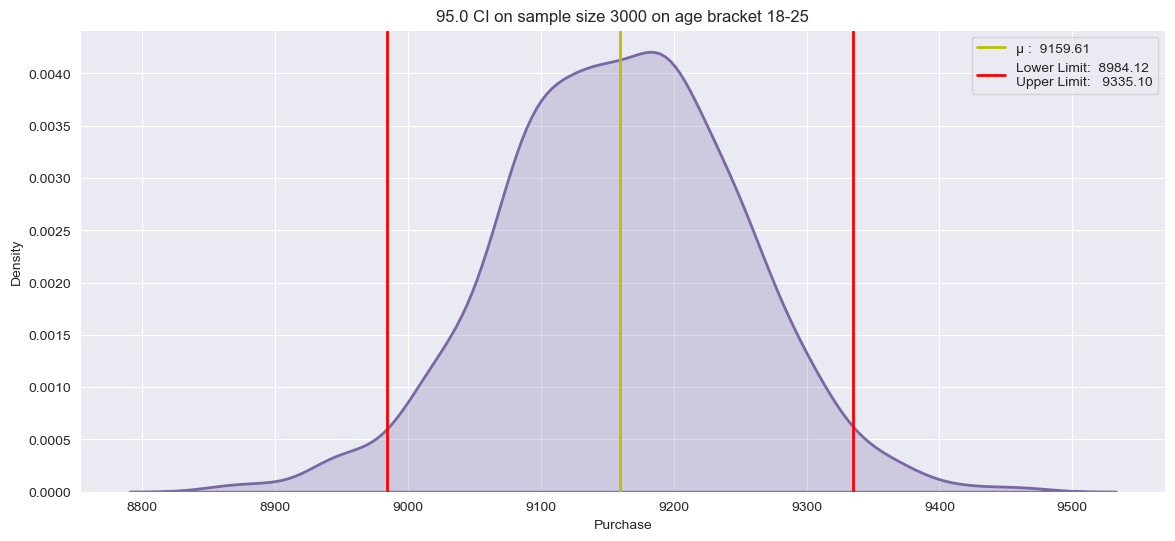

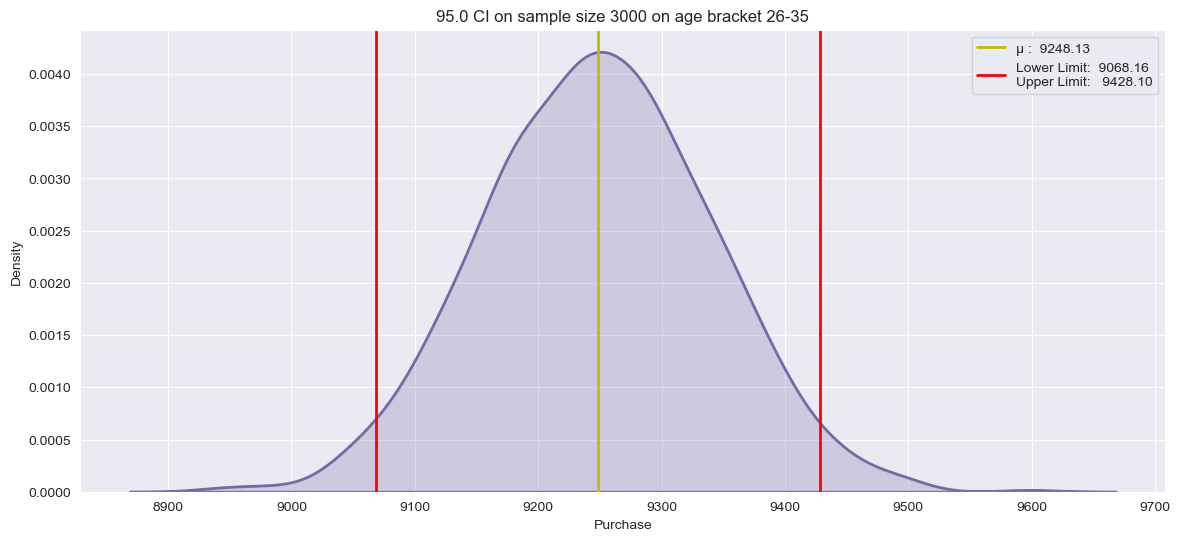

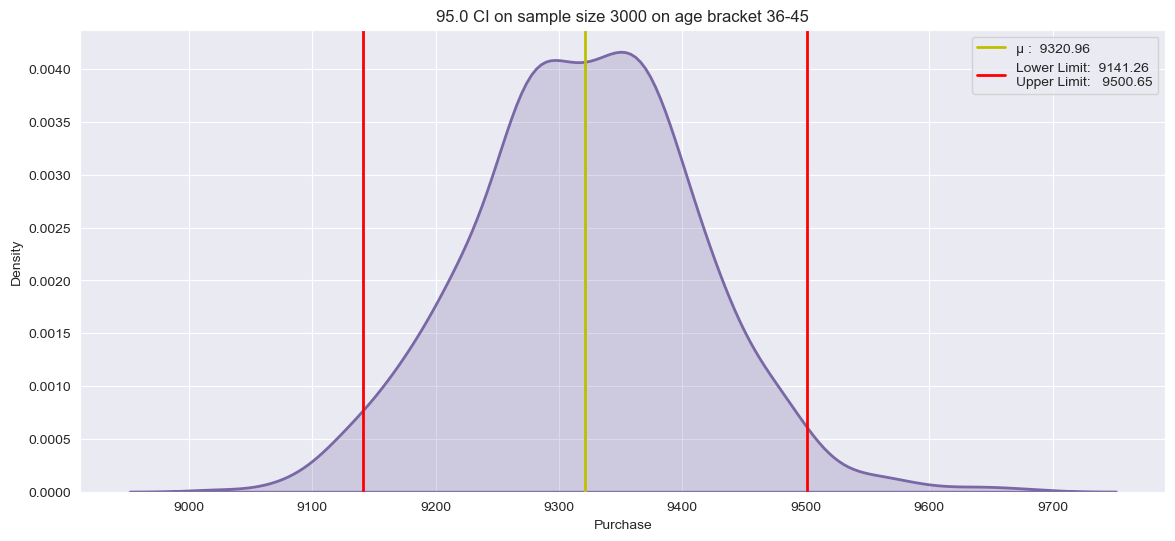

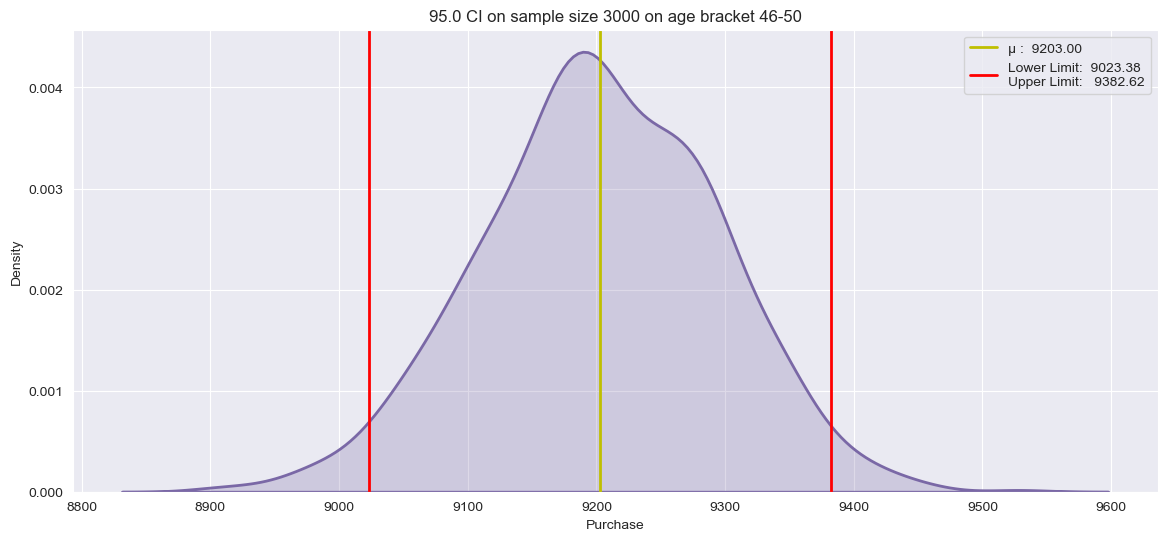

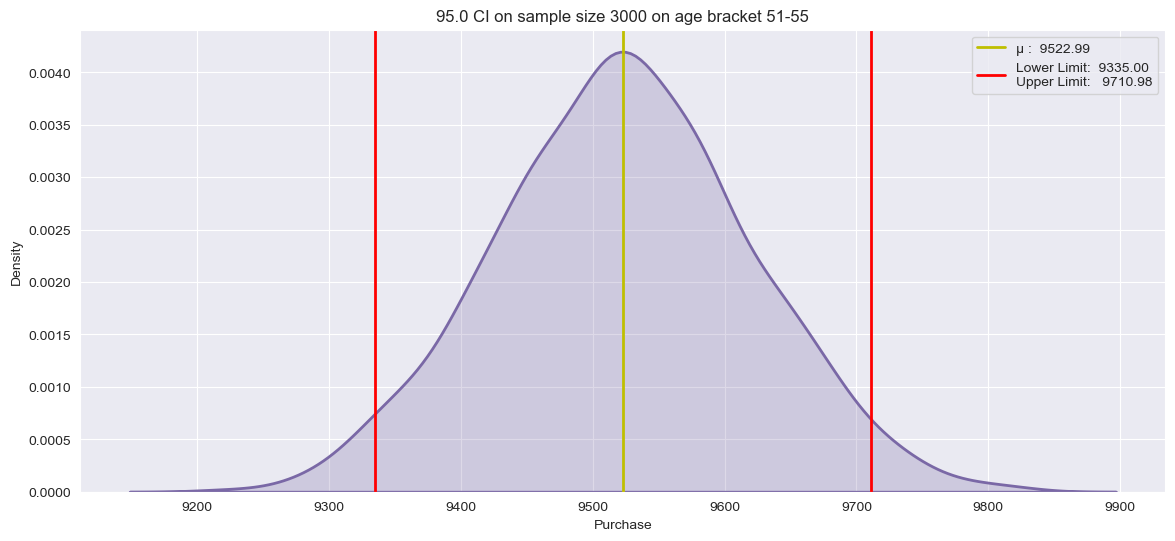

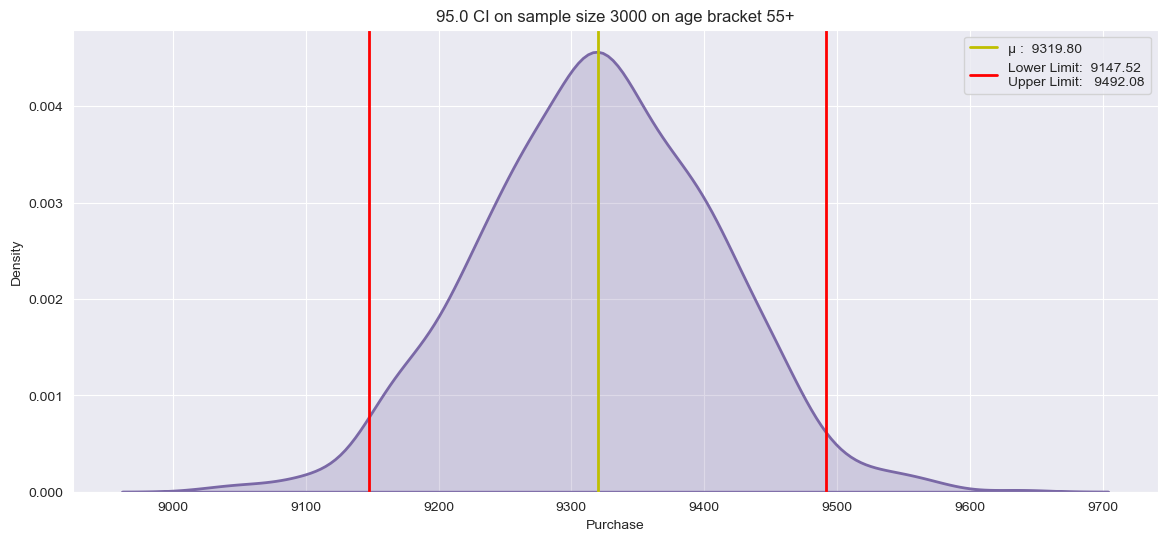

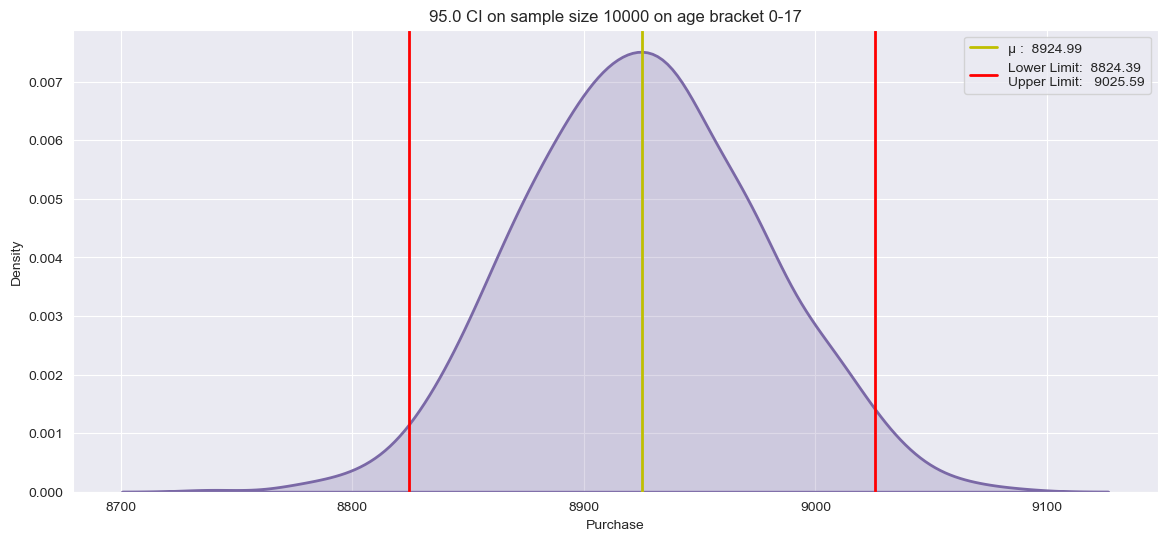

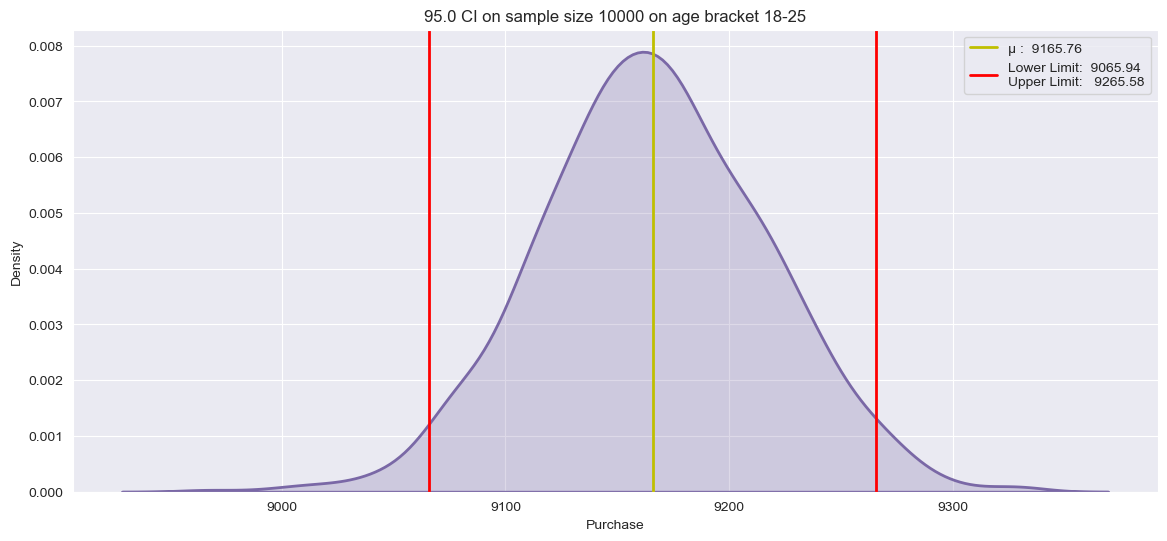

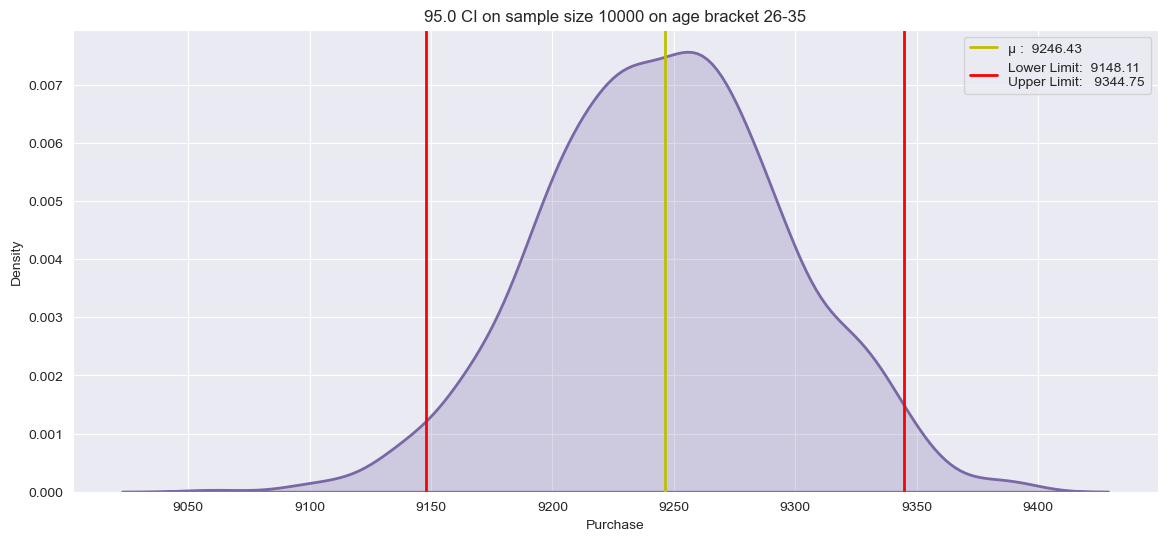

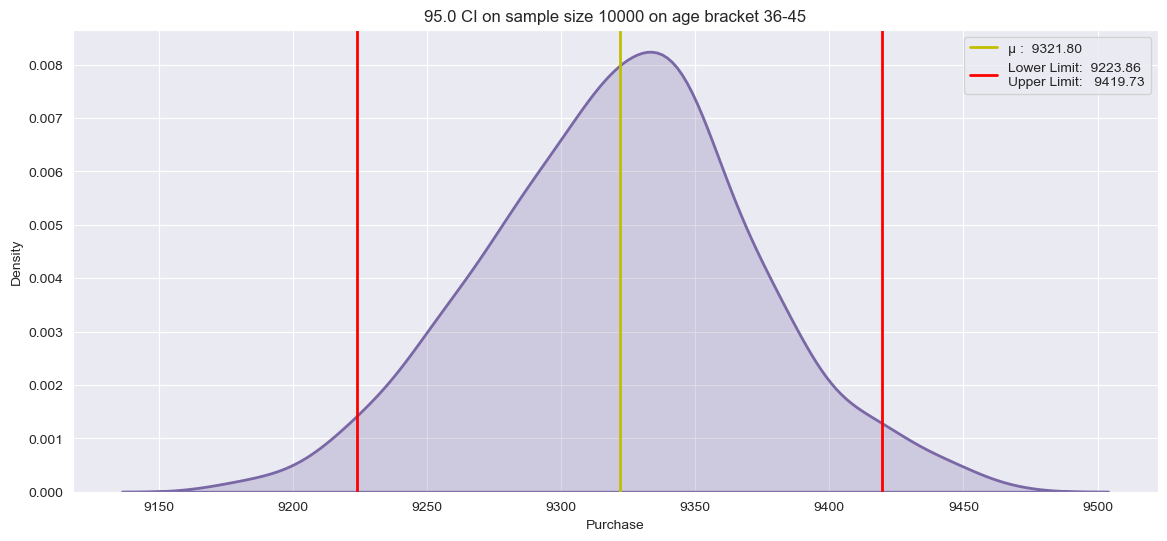

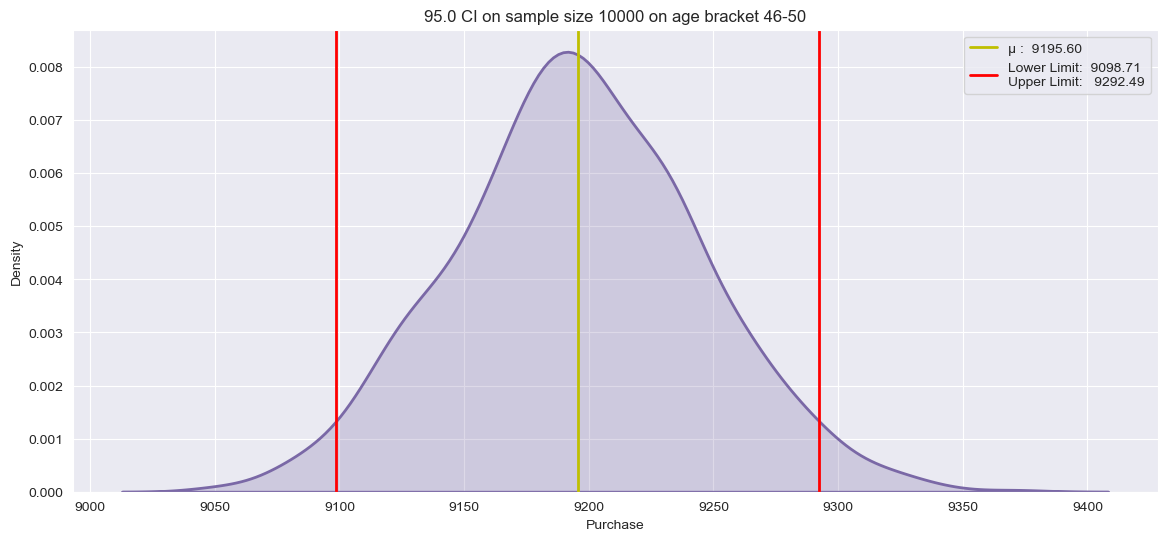

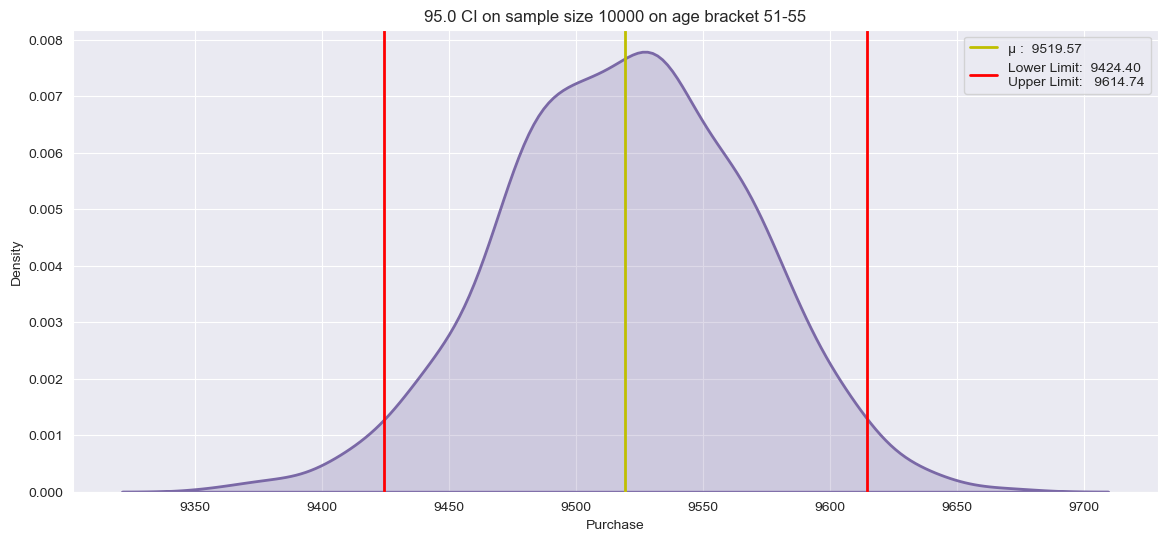

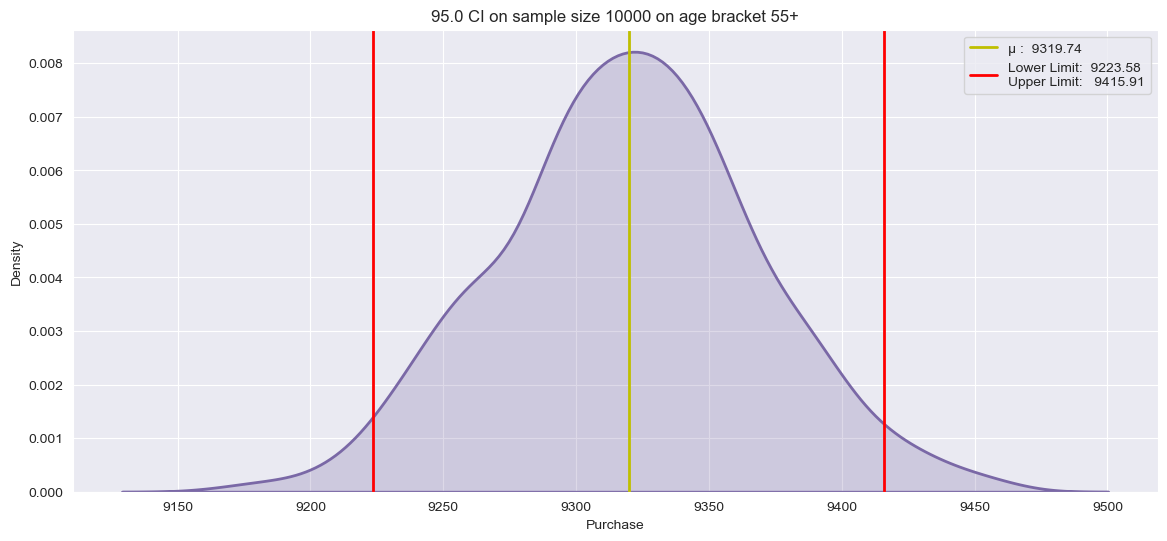

In [79]:
itr_size = 1000
smp_size = [30,300,3000,10000]
ci = 0.95
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

array = np.empty((0,8))

for smp_siz in smp_size:
    for age in age_list:
        mean, ll_m, ul_m = bootstrapping_age(data_copy[data_copy['Age'] == age]['Purchase'],smp_siz,itr_size,ci, age)

        array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [96]:
age_data.head(7)

Age_Group                                               Mean Lower_limit  \
0      0-17  [8583.0, 9683.53, 9144.4, 8398.67, 8001.87, 91...     7087.74   
1     18-25  [7900.33, 9061.4, 9525.17, 8990.13, 10344.67, ...     7291.67   
2     26-35  [10098.87, 8732.57, 10302.57, 8691.27, 8605.93...     7504.91   
3     36-45  [8691.83, 8621.37, 8173.6, 10448.27, 9821.32, ...     7545.81   
4     46-50  [10563.57, 9497.37, 9522.43, 8939.0, 10575.43,...      7425.6   
5     51-55  [11080.27, 9000.07, 9709.73, 10231.3, 8608.07,...      7829.6   
6       55+  [9889.33, 9983.23, 8769.8, 9279.97, 8844.9, 90...     7532.78   

  Upper_limit Sample_Size                   CI    Range Confidence_pct  
0    10728.59          30  [7087.74, 10728.59]  3640.85             95  
1    10953.09          30  [7291.67, 10953.09]  3661.42             95  
2    11062.45          30  [7504.91, 11062.45]  3557.54             95  
3    11063.52          30  [7545.81, 11063.52]  3517.71             95  
4     10937.9          30    [7425.6, 10937.9]   3512.3             95  
5    11207.32          30   [7829.6, 11207.32]  3377.72             95  
6    11151.96          30  [7532.78, 11151.96]  3619.18             95

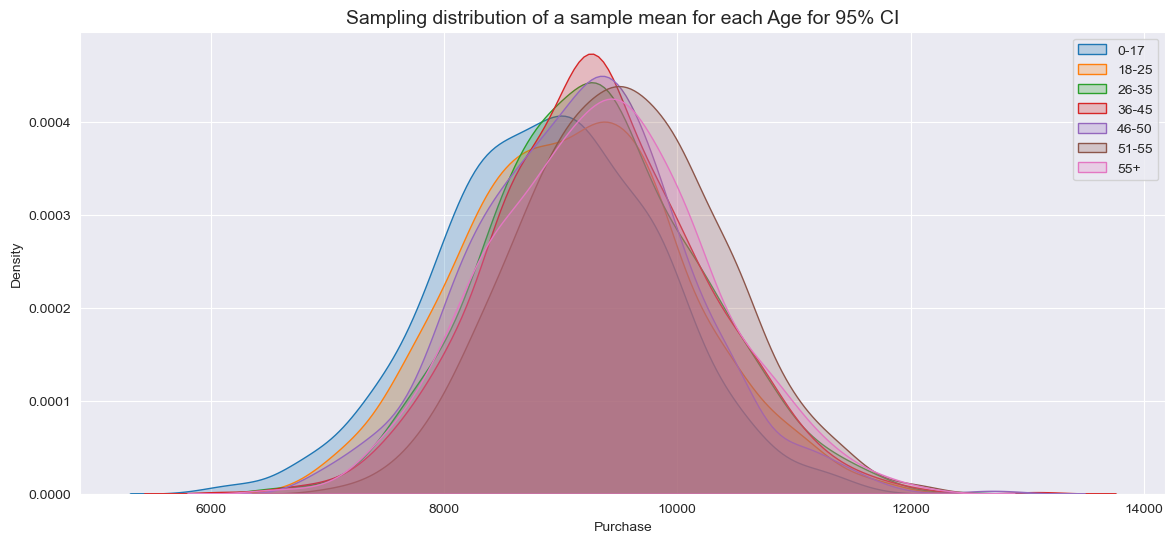

In [102]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in range(len(age_list)):
    age_dict[age_list[i]] = age_data.loc[i,'Mean']
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age for 95% CI",fontsize=14)
plt.xlabel('Purchase')
plt.legend(loc='upper right')

plt.show()
    


Spending by Age_group 0-17 is low compared to other age groups.

Customers in Age_group 51-55 spend the most between 9381.9 and 9463.7